In [1]:
import sys, os; sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__) if '__file__' in globals() else os.getcwd(), '..')))
from utils.model_loader import get_model_fits
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/Users/augustarnstad/Documents/source_code/prior_paper/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#results_dir_priors = "results/priors/single_layer/tanh/friedman_correlated"
results_dir_posteriors = "results/regression/single_layer/tanh/friedman"
results_dir_posteriors_correlated = "results/regression/single_layer/tanh/friedman_correlated"

#prior_names = ["Dirichlet Horseshoe", "Regularized Horseshoe", "Dirichlet Student T", "Gaussian"]
posterior_names = ["Dirichlet Horseshoe tanh", "Regularized Horseshoe tanh", "Dirichlet Student T tanh", "Gaussian tanh"]


# prior_N100_fits = get_model_fits(
#     config="Friedman_N100_p10_sigma1.00_seed1",
#     results_dir=results_dir_priors,
#     models=prior_names,
#     include_prior=False,
# )

# prior_N200_fits = get_model_fits(
#     config="Friedman_N200_p10_sigma1.00_seed2",
#     results_dir=results_dir_priors,
#     models=prior_names,
#     include_prior=False,
# )

# prior_N500_fits = get_model_fits(
#     config="Friedman_N500_p10_sigma1.00_seed11",
#     results_dir=results_dir_priors,
#     models=prior_names,
#     include_prior=False,
# )
    
posterior_N100_fits = get_model_fits(
    config="Friedman_N100_p10_sigma1.00_seed1",
    results_dir=results_dir_posteriors,
    models=posterior_names,
    include_prior=False,
)

posterior_N100_fits_correlated = get_model_fits(
    config="Friedman_N100_p10_sigma1.00_seed1",
    results_dir=results_dir_posteriors_correlated,
    models=posterior_names,
    include_prior=False,
)

# posterior_N200_fits = get_model_fits(
#     config="Friedman_N200_p10_sigma1.00_seed6",
#     results_dir=results_dir_posteriors,
#     models=posterior_names,
#     include_prior=False,
# )

# posterior_N500_fits = get_model_fits(
#     config="Friedman_N500_p10_sigma1.00_seed11",
#     results_dir=results_dir_posteriors,
#     models=posterior_names,
#     include_prior=False,
# )


15:58:44 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 31 divergent transitions (3.1%)
	Chain 1 had 969 iterations at max treedepth (96.9%)
	Chain 2 had 6 divergent transitions (0.6%)
	Chain 2 had 994 iterations at max treedepth (99.4%)
	Chain 3 had 2 divergent transitions (0.2%)
	Chain 3 had 998 iterations at max treedepth (99.8%)
	Chain 4 had 18 divergent transitions (1.8%)
	Chain 4 had 982 iterations at max treedepth (98.2%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
15:58:45 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 5 divergent transitions (0.5%)
	Chain 1 had 995 iterations at max treedepth (99.5%)
	Chain 2 had 6 divergent transitions (0.6%)
	Chain 2 had 994 iterations at max treedepth (99.4%)
	Chain 3 had 6 divergent transitions (0.6%)
	Chain 3 had 994 iterations at max treedepth (99.4%)
	Chain 4 had 13 divergent transitions (1.3%)
	Chain 4 had 987 iterations at max treedept

In [3]:
path = "datasets/friedman/Friedman_N100_p10_sigma1.00_seed1.npz"
data = np.load(path)
X = data['X_train']
y = data['y_train']

path_correlated = "datasets/friedman_correlated/Friedman_N100_p10_sigma1.00_seed1.npz"
data_correlated = np.load(path_correlated)
X_correlated = data_correlated['X_train']
y_correlated = data_correlated['y_train']

In [ ]:
from utils.kappa_matrix import extract_model_draws, compute_shrinkage

# ---------- Minimal kjøreeksempel ----------
#draw = 0
#W, b1, v, b2, noise, tau_w, tau_v, lambda_tilde = extract_model_draws(posterior_N100_fits, model='Gaussian tanh')
W, b1, v, b2, noise, tau_w, tau_v, lambda_eff = extract_model_draws(
    posterior_N100_fits, model='Gaussian tanh'
)
R_gauss, S_gauss, P_gauss, G_gauss, shrink_gauss, eigs_gauss, df_gauss = compute_shrinkage(
    X, W, b1, v, noise, tau_w, tau_v, lambda_eff,
    activation="tanh",
    include_b1_in_Sigma=True,
    include_b2_in_Sigma=True,
)
print("done with Gauss")

#W, b1, v, b2, noise, tau_w, tau_v, lambda_tilde = extract_model_draws(posterior_N100_fits, model='Regularized Horseshoe tanh')
W, b1, v, b2, noise, tau_w, tau_v, lambda_eff = extract_model_draws(
    posterior_N100_fits, model='Regularized Horseshoe tanh'
)
# YOU CAN ALSO LOOK AT THE RAW LAMBDA VALUES BY RUNNING:
# W, b1, v, b2, noise, tau_w, tau_v, lambda_raw = extract_model_draws(
#     posterior_N100_fits, model='Regularized Horseshoe tanh', lambda_kind='raw'
# )
R_RHS, S_RHS, P_RHS, G_RHS, shrink_RHS, eigs_RHS, df_eff_RHS = compute_shrinkage(
    X, W, b1, v, noise, tau_w, tau_v, lambda_eff,
    activation="tanh",
    include_b1_in_Sigma=True,
    include_b2_in_Sigma=True,
)
print("done with RHS")
#W, b1, v, b2, noise, tau_w, tau_v, lambda_tilde = extract_model_draws(posterior_N100_fits, model='Dirichlet Horseshoe tanh')
W, b1, v, b2, noise, tau_w, tau_v, lambda_eff = extract_model_draws(
    posterior_N100_fits, model='Dirichlet Horseshoe tanh'
)
R_DHS, S_DHS, P_DHS, G_DHS, shrink_DHS, eigs_DHS, df_eff_DHS = compute_shrinkage(
    X, W, b1, v, noise, tau_w, tau_v, lambda_eff,
    activation="tanh",
    include_b1_in_Sigma=True,
    include_b2_in_Sigma=True,
)
print("done with DHS")
#W, b1, v, b2, noise, tau_w, tau_v, lambda_tilde = extract_model_draws(posterior_N100_fits, model='Dirichlet Student T tanh')
W, b1, v, b2, noise, tau_w, tau_v, lambda_eff = extract_model_draws(
    posterior_N100_fits, model='Dirichlet Student T tanh'
)
R_DST, S_DST, P_DST, G_DST, shrink_DST, eigs_DST, df_eff_DST = compute_shrinkage(
    X, W, b1, v, noise, tau_w, tau_v, lambda_eff,
    activation="tanh",
    include_b1_in_Sigma=True,
    include_b2_in_Sigma=True,
)
print("done with DST")

In [4]:
from utils.kappa_matrix import extract_model_draws, compute_shrinkage

# ---------- Minimal kjøreeksempel ----------
#draw = 0
#W, b1, v, b2, noise, tau_w, tau_v, lambda_tilde = extract_model_draws(posterior_N100_fits, model='Gaussian tanh')
W, b1, v, b2, noise, tau_w, tau_v, lambda_eff = extract_model_draws(
    posterior_N100_fits_correlated, model='Gaussian tanh'
)
R_gauss, S_gauss, P_gauss, G_gauss, shrink_gauss, eigs_gauss, df_gauss = compute_shrinkage(
    X_correlated, W, b1, v, noise, tau_w, tau_v, lambda_eff,
    activation="tanh",
    include_b1_in_Sigma=True,
    include_b2_in_Sigma=True,
)
print("done with Gauss")

#W, b1, v, b2, noise, tau_w, tau_v, lambda_tilde = extract_model_draws(posterior_N100_fits, model='Regularized Horseshoe tanh')
W, b1, v, b2, noise, tau_w, tau_v, lambda_eff = extract_model_draws(
    posterior_N100_fits_correlated, model='Regularized Horseshoe tanh'
)
# YOU CAN ALSO LOOK AT THE RAW LAMBDA VALUES BY RUNNING:
# W, b1, v, b2, noise, tau_w, tau_v, lambda_raw = extract_model_draws(
#     posterior_N100_fits, model='Regularized Horseshoe tanh', lambda_kind='raw'
# )
R_RHS, S_RHS, P_RHS, G_RHS, shrink_RHS, eigs_RHS, df_eff_RHS = compute_shrinkage(
    X_correlated, W, b1, v, noise, tau_w, tau_v, lambda_eff,
    activation="tanh",
    include_b1_in_Sigma=True,
    include_b2_in_Sigma=True,
)
print("done with RHS")
#W, b1, v, b2, noise, tau_w, tau_v, lambda_tilde = extract_model_draws(posterior_N100_fits, model='Dirichlet Horseshoe tanh')
W, b1, v, b2, noise, tau_w, tau_v, lambda_eff = extract_model_draws(
    posterior_N100_fits_correlated, model='Dirichlet Horseshoe tanh'
)
R_DHS, S_DHS, P_DHS, G_DHS, shrink_DHS, eigs_DHS, df_eff_DHS = compute_shrinkage(
    X_correlated, W, b1, v, noise, tau_w, tau_v, lambda_eff,
    activation="tanh",
    include_b1_in_Sigma=True,
    include_b2_in_Sigma=True,
)
print("done with DHS")
#W, b1, v, b2, noise, tau_w, tau_v, lambda_tilde = extract_model_draws(posterior_N100_fits, model='Dirichlet Student T tanh')
W, b1, v, b2, noise, tau_w, tau_v, lambda_eff = extract_model_draws(
    posterior_N100_fits_correlated, model='Dirichlet Student T tanh'
)
R_DST, S_DST, P_DST, G_DST, shrink_DST, eigs_DST, df_eff_DST = compute_shrinkage(
    X_correlated, W, b1, v, noise, tau_w, tau_v, lambda_eff,
    activation="tanh",
    include_b1_in_Sigma=True,
    include_b2_in_Sigma=True,
)
print("done with DST")

done with Gauss
done with RHS
done with DHS
done with DST


In [5]:
SP_inv_S_gauss = np.eye(16*10)[:, :] - R_gauss
SP_inv_S_RHS = np.eye(16*10)[:, :] - R_RHS
SP_inv_S_DHS = np.eye(16*10)[:, :] - R_DHS
SP_inv_S_DST = np.eye(16*10)[:, :] - R_DST

In [18]:
from utils.kappa_matrix import visualize_models

matrices_S = [
    np.mean(S_gauss, axis=0),
    np.mean(S_RHS, axis=0),
    np.mean(S_DHS, axis=0),
    np.mean(S_DST, axis=0),
]
names_S = ["S (Gauss)", "S (RHS)", "S (DHS)", "S (DST)"]

matrices_G = [
    np.mean((G_gauss), axis=0),
    np.mean((G_RHS), axis=0),
    np.mean((G_DHS), axis=0),
    np.mean((G_DST), axis=0),
]

names_G = ["G (Gauss)", "G (RHS)", "G (DHS)", "G (DST)"]

matrices_shrink = [
    np.mean((shrink_gauss), axis=0),
    np.mean((shrink_RHS), axis=0),
    np.mean((shrink_DHS), axis=0),
    np.mean((shrink_DST), axis=0),
]

names_shrink = ["(I+G)^{-1}G (Gauss)", "(I+G)^{-1}G (RHS)", "(I+G)^{-1}G (DHS)", "(I+G)^{-1}G (DST)"]

matrices_operator = [
    np.mean((SP_inv_S_gauss), axis=0),
    np.mean((SP_inv_S_RHS), axis=0),
    np.mean((SP_inv_S_DHS), axis=0),
    np.mean((SP_inv_S_DST), axis=0),
]

names_operator = ["(P+S)^{-1}S (Gauss)", "(P+S)^{-1}S (RHS)", "(P+S)^{-1}S (DHS)", "(P+S)^{-1}S (DST)"]

In [ ]:
visualize_models(matrices_S, names_S, H=16, p=10, use_abs=False)

In [ ]:
visualize_models(matrices_G, names_G, H=16, p=10, use_abs=False)#, cmap="magma")


In [ ]:
visualize_models(matrices_shrink, names_shrink, H=16, p=10, use_abs=False)#, cmap="magma")

In [ ]:
visualize_models(matrices_operator, names_operator, H=16, p=10, use_abs=False)#, cmap="magma")

In [6]:
# --- Traces as distributions (df_eff = tr(R) vs total shrinkage = tr(I-R)) ---
import matplotlib.pyplot as plt

# Effective dof: trace of (I+G)^{-1}G per draw
tr_R_gauss = np.trace(shrink_gauss, axis1=1, axis2=2)
tr_R_RHS   = np.trace(shrink_RHS,   axis1=1, axis2=2)
tr_R_DHS   = np.trace(shrink_DHS,   axis1=1, axis2=2)
tr_R_DST   = np.trace(shrink_DST,   axis1=1, axis2=2)

# If you also want “total shrinkage”, use your SP_inv_S_* stacks (I - R):
tr_SPinvS_gauss = np.trace(SP_inv_S_gauss, axis1=1, axis2=2)
tr_SPinvS_RHS   = np.trace(SP_inv_S_RHS,   axis1=1, axis2=2)
tr_SPinvS_DHS   = np.trace(SP_inv_S_DHS,   axis1=1, axis2=2)
tr_SPinvS_DST   = np.trace(SP_inv_S_DST,   axis1=1, axis2=2)



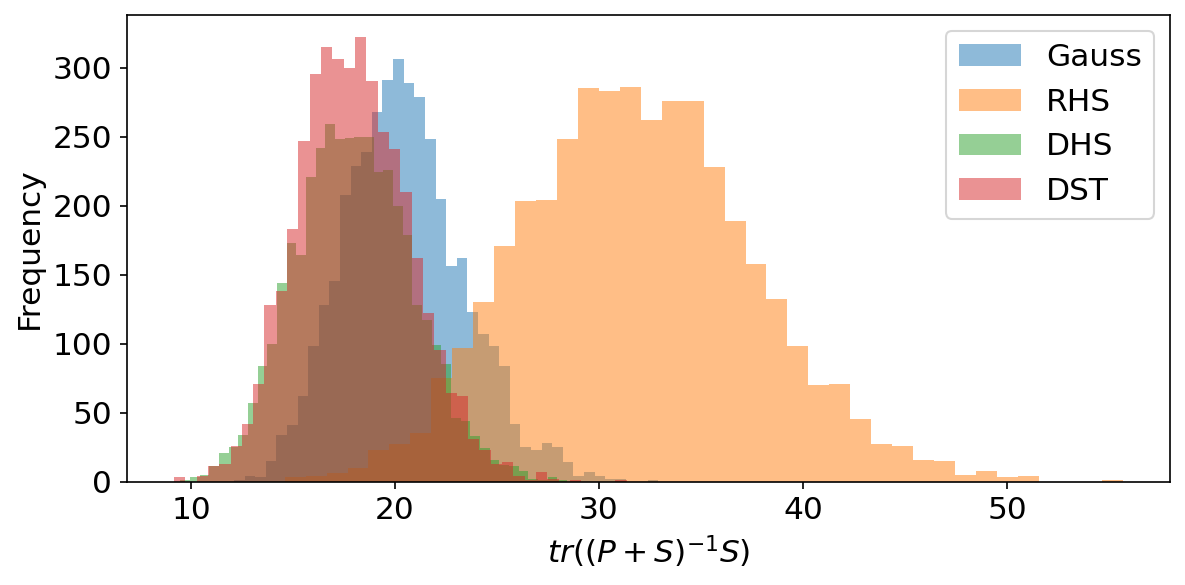

In [7]:
# Plot df_eff distributions
# plt.figure(figsize=(8,4), dpi=150)
# bins = 40
# plt.hist(tr_R_gauss, bins=bins, alpha=0.5, label="Gauss")
# plt.hist(tr_R_RHS,   bins=bins, alpha=0.5, label="RHS")
# plt.hist(tr_R_DHS,   bins=bins, alpha=0.5, label="DHS")
# plt.hist(tr_R_DST,   bins=bins, alpha=0.5, label="DST")
# plt.xlabel("trace((I+G)^{-1}G)  [effective dof]")
# plt.ylabel("count")
# plt.legend()
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(8,4), dpi=150)
bins = 40
plt.hist(tr_SPinvS_gauss, bins=bins, alpha=0.5, label="Gauss")
plt.hist(tr_SPinvS_RHS,   bins=bins, alpha=0.5, label="RHS")
plt.hist(tr_SPinvS_DHS,   bins=bins, alpha=0.5, label="DHS")
plt.hist(tr_SPinvS_DST,   bins=bins, alpha=0.5, label="DST")
plt.xlabel(r"$tr((P+S)^{-1}S)$", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.tight_layout()
plt.savefig("figures_for_use_in_paper/Friedman_m_eff_correlated.pdf", bbox_inches="tight")
plt.show()

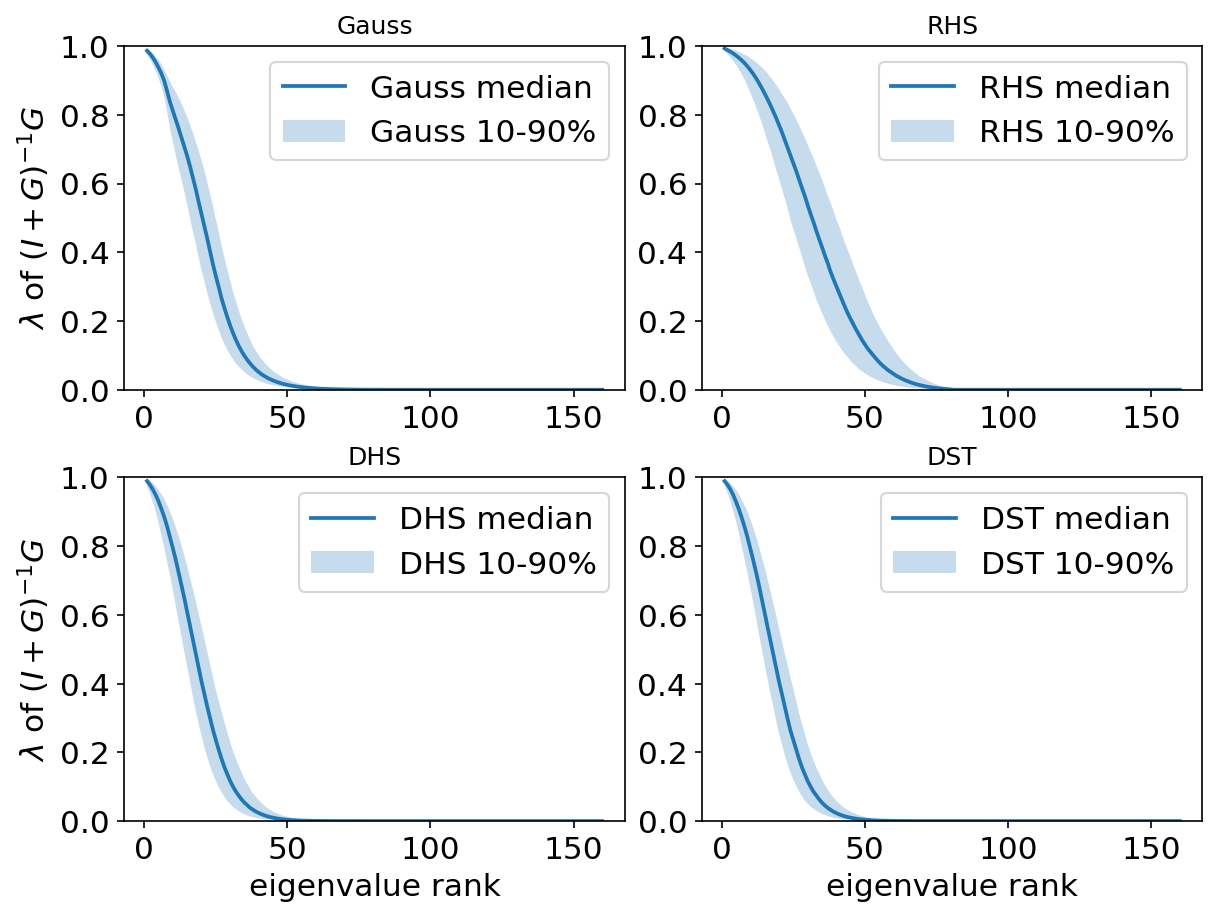

In [8]:
# --- Median eigenvalue curve (with bands) for shrink stacks ---
import matplotlib.pyplot as plt
def median_eigcurve(stack, q_lo=0.1, q_hi=0.9):
    """
    stack: (D, N, N) of symmetric PSD matrices with eigenvalues in [0,1].
    Returns: dict with 'median', 'lo', 'hi' over the sorted eigenvalues (descending).
    """
    D, N, _ = stack.shape
    evals = np.empty((D, N))
    for d in range(D):
        w = np.linalg.eigvalsh(stack[d])
        evals[d] = np.sort(w)[::-1]  # descending
    med = np.median(evals, axis=0)
    lo  = np.quantile(evals, q_lo, axis=0)
    hi  = np.quantile(evals, q_hi, axis=0)
    return {"median": med, "lo": lo, "hi": hi}

curves = {
    "Gauss": median_eigcurve(shrink_gauss),
    "RHS":   median_eigcurve(shrink_RHS),
    "DHS":   median_eigcurve(shrink_DHS),
    "DST":   median_eigcurve(shrink_DST),
}

# Plot 2x2 small multiples
fig, axes = plt.subplots(2, 2, figsize=(8,6), dpi=150, constrained_layout=True)
axes = axes.ravel()
for ax, (name, c) in zip(axes, curves.items()):
    x = np.arange(1, len(c["median"])+1)
    ax.plot(x, c["median"], lw=1.8, label=f"{name} median")
    ax.fill_between(x, c["lo"], c["hi"], alpha=0.25, label=f"{name} {10}-{90}%", step=None)
    ax.set_title(name)
    if name == "DHS" or name == "DST":
        ax.set_xlabel("eigenvalue rank", fontsize=15)
    if name == "Gauss" or name == "DHS":
        ax.set_ylabel(r"$\lambda$ of $(I+G)^{-1}G$", fontsize=15)
    ax.set_ylim(0, 1)
    ax.tick_params(axis='both', labelsize=15)
    ax.legend(loc="upper right", fontsize=15)
plt.savefig("figures_for_use_in_paper/Friedman_eigenvalue_curve_correlated.pdf", bbox_inches="tight")
plt.show()


In [21]:
import numpy as np
import pandas as pd

def summarize_anisotropy(operators: np.ndarray, k_leading: int = 5) -> pd.DataFrame:
    """
    operators: array of shape (D, N, N), e.g. shrinkage matrices over D draws.

    Returns a DataFrame with rows = metrics (kappa, CV, r_eff, mu_mean, A_2)
    and columns = mean, q05, q50, q95.
    """
    D, N, _ = operators.shape

    kappa_k   = np.empty(D)
    cv      = np.empty(D)
    r_eff   = np.empty(D)
    mu_mean = np.empty(D)
    A2      = np.empty(D)

    eps = 1e-12

    for d in range(D):
        A = operators[d]
        # Symmetrize for safety
        A_sym = 0.5 * (A + A.T)

        # Eigenvalues
        eigvals = np.linalg.eigvalsh(A_sym)
        eigvals = np.clip(eigvals, eps, None)  # avoid zeros/negatives numerically

        m = eigvals.mean()
        mu_mean[d] = m

        # Condition number
        eigvals_sorted = np.sort(eigvals)[::-1]
        #k = min(k_leading, d)
        lam1 = eigvals_sorted[0]
        lamk = eigvals_sorted[k_leading - 1]
        kappa_k[d] = float(lam1 / lamk)
        #kappa[d] = eigvals.max() / eigvals.min()

        # Coefficient of variation
        cv[d] = eigvals.std() / m

        # Effective rank
        p = eigvals / eigvals.sum()
        r_eff[d] = np.exp(-np.sum(p * np.log(p)))

        # A_2: deviation from scalar identity
        c = m
        num = np.linalg.norm(A_sym - c * np.eye(N), ord="fro")
        den = np.linalg.norm(A_sym, ord="fro")
        A2[d] = num / den

    metrics = {
        "kappa_k":   kappa_k,
        "CV":      cv,
        "r_eff":   r_eff,
        "mu_mean": mu_mean,
        "A_2":     A2,
    }

    rows = []
    for name, arr in metrics.items():
        rows.append({
            "metric": name,
            "mean": float(np.mean(arr)),
            "q05":  float(np.quantile(arr, 0.05)),
            "q50":  float(np.quantile(arr, 0.50)),
            "q95":  float(np.quantile(arr, 0.95)),
        })

    return pd.DataFrame(rows).set_index("metric")



In [ ]:
summary_gauss = summarize_anisotropy(shrink_gauss)
summary_RHS = summarize_anisotropy(shrink_RHS)
summary_DHS = summarize_anisotropy(shrink_DHS)
summary_DST = summarize_anisotropy(shrink_DST)
print(summary_gauss)
print(summary_RHS)
print(summary_DHS)
print(summary_DST)


In [ ]:
# --- Helper: blockwise normalized inner-product ratio for a stack of G ---
import numpy as np

def block_ratio_median(G_stack: np.ndarray, H: int, p: int, eps: float = 1e-12):
    """
    For each draw/d, computes R_d = |G_d| / sqrt(diag(G_d) diag(G_d)^T) within each (p x p) block h.
    Returns the elementwise median over draws (ignoring cross-block entries).
    
    G_stack : (D, N, N) with N = H*p
    Output  : (N, N) median ratio; outside-block entries set to 0 for convenience.
    """
    D, N, _ = G_stack.shape
    # block mask: True if (i,j) are in the same hidden-unit block
    idx = np.arange(N)
    h_idx = idx // p
    same_block = (h_idx[:, None] == h_idx[None, :])
    
    ratios = np.empty_like(G_stack)
    for d in range(D):
        G = 0.5 * (G_stack[d] + G_stack[d].T)                     # symmetrize
        dvec = np.clip(np.diag(G), eps, None)
        denom = np.sqrt(np.outer(dvec, dvec))
        R = np.divide(np.abs(G), denom, out=np.zeros_like(G), where=(denom > 0))
        # keep only within-block entries; mark cross-block as NaN (ignored in median)
        R_masked = np.where(same_block, R, np.nan)
        ratios[d] = R_masked

    # median over draws ignoring NaNs (i.e., cross-block)
    R_med = np.nanmedian(ratios, axis=0)
    # put zeros outside blocks for cleaner plotting
    R_med = np.where(same_block, R_med, 0.0)
    # exact ones on the diagonal by definition
    np.fill_diagonal(R_med, 1.0)
    return R_med

# --- Compute median ratio matrices for the four priors ---
H, p = 16, 10  # adjust if needed
ratio_Gauss = block_ratio_median(G_gauss, H=H, p=p)
ratio_RHS   = block_ratio_median(G_RHS,   H=H, p=p)
ratio_DHS   = block_ratio_median(G_DHS,   H=H, p=p)
ratio_DST   = block_ratio_median(G_DST,   H=H, p=p)


# --- (Optional) Scalar summaries: median off-diagonal ratio within blocks ---
def offdiag_block_stats(R_med: np.ndarray, H: int, p: int):
    N = H * p
    idx = np.arange(N)
    h_idx = idx // p
    same_block = (h_idx[:, None] == h_idx[None, :])
    offdiag = same_block & (~np.eye(N, dtype=bool))
    vals = R_med[offdiag]
    return {
        "median_offdiag": float(np.median(vals)),
        "q10_offdiag": float(np.quantile(vals, 0.10)),
        "q90_offdiag": float(np.quantile(vals, 0.90)),
    }

print("Gauss:", offdiag_block_stats(ratio_Gauss, H, p))
print("RHS:  ", offdiag_block_stats(ratio_RHS,   H, p))
print("DHS:  ", offdiag_block_stats(ratio_DHS,   H, p))
print("DST:  ", offdiag_block_stats(ratio_DST,   H, p))


## Differences between shrinkage matrices

In [ ]:
import numpy as np

def plot_point1_aligned(A, B, nameA="A", nameB="B",
                        H=16, p=8, use_abs=False, q_low=0.05, q_high=0.99):
    """
    Point (1): Best-scale–aligned difference.
      - Panel 1: A
      - Panel 2: c*·B  (c* = <A,B>_F / ||B||_F^2)
      - Panel 3: A - c*·B
      - Panel 4: (blank filler)
    """
    A = np.asarray(A, float); B = np.asarray(B, float)
    num = np.sum(A * B)
    den = np.sum(B * B) if np.sum(B * B) != 0 else 1.0
    c_star = num / den
    cosF = num / (np.linalg.norm(A, "fro") * (np.linalg.norm(B, "fro") + 1e-12))

    mats  = [A, c_star * B, A - c_star * B, np.zeros_like(A)]
    names = [
        f"{nameA}",
        f"{nameB} scaled (c*={c_star:.3g})",
        f"Aligned diff: {nameA} − {c_star:.3g}·{nameB}\ncos_F={cosF:.3f}",
        "(unused)"
    ]
    return mats, names #visualize_models(mats, names, H=H, p=p, use_abs=use_abs, q_low=q_low, q_high=q_high)

def plot_point2_unit_energy(A, B, nameA="A", nameB="B",
                            H=16, p=8, use_abs=False, q_low=0.05, q_high=0.99):
    """
    Point (2): Unit-energy (Frobenius-normalized) side-by-side + difference.
      - Panel 1: A / ||A||_F
      - Panel 2: B / ||B||_F
      - Panel 3: (A/||A||_F) − (B/||B||_F)
      - Panel 4: (unused filler)
    """
    A = np.asarray(A, float); B = np.asarray(B, float)
    Af = A / (np.linalg.norm(A, "fro") + 1e-12)
    Bf = B / (np.linalg.norm(B, "fro") + 1e-12)

    mats  = [Af, Bf, Af - Bf, np.zeros_like(A)]
    names = [
        f"{nameA} / ||{nameA}||_F",
        f"{nameB} / ||{nameB}||_F",
        "Difference (unit-energy)",
        "(unused)"
    ]
    visualize_models(mats, names, H=H, p=p, use_abs=use_abs, q_low=q_low, q_high=q_high)


In [ ]:
mats_DHS_v_RHS, names_DHS_v_RHS = plot_point1_aligned(np.mean((SP_inv_S_DHS), axis=0), np.mean((SP_inv_S_RHS), axis=0), "DHS", "RHS")
mats_DHS_v_gauss, names_DHS_v_gauss = plot_point1_aligned(np.mean((SP_inv_S_DHS), axis=0), np.mean((SP_inv_S_gauss), axis=0), "DHS", "Gauss")
mats_DST_v_RHS, names_DST_v_RHS = plot_point1_aligned(np.mean((SP_inv_S_DST), axis=0), np.mean((SP_inv_S_RHS), axis=0), "DST", "RHS")
mats_DST_v_gauss, names_DST_v_gauss = plot_point1_aligned(np.mean((SP_inv_S_DST), axis=0), np.mean((SP_inv_S_gauss), axis=0), "DST", "Gauss")
mats_combined = [
    mats_DHS_v_RHS[2],
    mats_DHS_v_gauss[2],
    mats_DST_v_RHS[2],
    mats_DST_v_gauss[2],
]

names_combined = [
    names_DHS_v_RHS[2],
    names_DHS_v_gauss[2],
    names_DST_v_RHS[2],
    names_DST_v_gauss[2],
]

visualize_models(mats_combined, names_combined, H=16, p=10, use_abs=False, q_low=0.05, q_high=0.99)

## Bounds

In [17]:
# --- (1) Bound Σ_y^{-1}: compute c_min, c_max for a single draw ---
import numpy as np

def sigma_inverse_bounds(Phi_mat, tau_v, noise, J_b1=None, J_b2=None,
                         include_b1=True, include_b2=True):
    """
    Constructs Q so that Σ_y = σ^2 I + Q Q^T, then returns:
      c_min = 1 / (σ^2 + ||Q||_2^2),   c_max = 1 / σ^2.
    Here Q = [ J_b1,  τ_v * Φ,  (J_b2) ] with columns included per flags.
    """
    cols = [tau_v * Phi_mat]  # Φ always contributes with τ_v
    if include_b1 and (J_b1 is not None):
        cols.insert(0, J_b1)  # [J_b1, τ_v Φ, ...]
    if include_b2 and (J_b2 is not None):
        cols.append(J_b2[:, None])  # add as a column

    Q = np.concatenate(cols, axis=1) if len(cols) > 1 else cols[0]
    # spectral norm of Q (largest singular value)
    smax = np.linalg.svd(Q, compute_uv=False)[0]
    c_min = 1.0 / (noise**2 + smax**2)
    c_max = 1.0 / (noise**2)
    return c_min, c_max, smax

# --- (2) Bound S and G via c_min, c_max; also get α-eigs of A = P^{-1/2} J^T J P^{-1/2} ---
def bound_S_and_G(JW, P, c_min, c_max):
    """
    S = J^T Σ_y^{-1} J, with c_min*J^T J ⪯ S ⪯ c_max*J^T J.
    Define A = P^{-1/2} J^T J P^{-1/2}; then c_min*A ⪯ G ⪯ c_max*A, where G=P^{-1/2} S P^{-1/2}.
    Returns:
      JJ      : J^T J
      A       : P^{-1/2} (J^T J) P^{-1/2}
      alpha   : eigvals(A) sorted ascending
      S_lo/up : lower/upper Loewner bounds on S
      G_lo/up : lower/upper Loewner bounds on G
    """
    JJ = JW.T @ JW
    d = np.diag(P).astype(float)
    Pinvhalf = np.diag(1.0 / np.sqrt(np.maximum(d, 1e-12)))
    A = Pinvhalf @ JJ @ Pinvhalf
    alpha = np.linalg.eigvalsh(A)  # >=0, ascending

    S_lower = c_min * JJ
    S_upper = c_max * JJ
    G_lower = c_min * A
    G_upper = c_max * A
    return JJ, A, alpha, S_lower, S_upper, G_lower, G_upper

# --- (3) Eigenvalue bands for (I+G)^{-1} G and trace/df bounds from α-eigs and c_min/c_max ---
def shrinkage_bands_from_alpha(alpha, c_min, c_max):
    """
    For f(t)=t/(1+t), eigenvalues of (I+G)^{-1}G satisfy:
       f(c_min*alpha_i) <= λ_i <= f(c_max*alpha_i)
    Returns lower/upper arrays (ascending to match alpha).
    """
    f = lambda t: t / (1.0 + t)
    lam_lo = f(c_min * alpha)
    lam_hi = f(c_max * alpha)
    return lam_lo, lam_hi

def df_bounds_from_alpha(alpha, c_min, c_max):
    """Lower/upper bounds on df_eff = tr( (I+G)^{-1}G )."""
    lam_lo, lam_hi = shrinkage_bands_from_alpha(alpha, c_min, c_max)
    return float(np.sum(lam_lo)), float(np.sum(lam_hi))

# --- (4) Bands over ALL draws (median band to overlay with your median eigenvalue curve) ---
def eigen_bands_over_draws(
    X, W_all, b_all, v_all, sigma_all, tau_w_all, tau_v_all, lambda_all,
    activation="tanh", include_b1_in_Sigma=True, include_b2_in_Sigma=True
):
    """
    For each draw:
      - build JW, Φ, J_b1, J_b2, get c_min/c_max,
      - build P and α-eigenvalues of A,
      - compute lower/upper shrinkage eigenvalue bands.
    Returns medians (and optional quantiles) across draws:
      lam_lo_med, lam_hi_med, df_lo_med, df_hi_med
    """
    D, H, p = W_all.shape
    N = H * p
    lam_lo_stack = np.empty((D, N))
    lam_hi_stack = np.empty((D, N))
    df_lo = np.empty(D)
    df_hi = np.empty(D)

    for d in range(D):
        Phi_mat, JW, Jb1, Jb2 = build_hidden_and_jacobian_W(
            X, W_all[d], b_all[d], v_all[d], activation=activation
        )
        c_min, c_max, _ = sigma_inverse_bounds(
            Phi_mat, tau_v=float(tau_v_all[d]), noise=float(sigma_all[d]),
            J_b1=(Jb1 if include_b1_in_Sigma else None),
            J_b2=(Jb2 if include_b2_in_Sigma else None),
            include_b1=include_b1_in_Sigma, include_b2=include_b2_in_Sigma
        )
        P = build_P_from_lambda_tau(lambda_all[d], tau_w=float(tau_w_all[d]))

        _, _, alpha, _, _, _, _ = bound_S_and_G(JW, P, c_min, c_max)
        lam_lo, lam_hi = shrinkage_bands_from_alpha(alpha, c_min, c_max)
        lam_lo_stack[d] = lam_lo
        lam_hi_stack[d] = lam_hi
        df_lo[d], df_hi[d] = df_bounds_from_alpha(alpha, c_min, c_max)

    # Medians across draws (coordinate-wise)
    lam_lo_med = np.median(lam_lo_stack, axis=0)
    lam_hi_med = np.median(lam_hi_stack, axis=0)
    df_lo_med  = float(np.median(df_lo))
    df_hi_med  = float(np.median(df_hi))

    # (Optional) also return 10/90% ribbons if you want
    lam_lo_q10 = np.quantile(lam_lo_stack, 0.10, axis=0)
    lam_hi_q90 = np.quantile(lam_hi_stack, 0.90, axis=0)

    summary = {
        "df_lo_med": df_lo_med,
        "df_hi_med": df_hi_med,
        "df_lo_q10": float(np.quantile(df_lo, 0.10)),
        "df_hi_q90": float(np.quantile(df_hi, 0.90)),
    }
    return lam_lo_med, lam_hi_med, lam_lo_q10, lam_hi_q90, summary



In [ ]:
# --- (5) Quick demo on one model (e.g., RHS): print Σ_y^{-1} bounds and df bounds, then plot ---
import matplotlib.pyplot as plt

# Example: use your RHS arrays (replace with Gauss/DHS/DST as needed)
W_all, b_all, v_all, c_all, sigma_all, tau_w_all, tau_v_all, lambda_all = \
    extract_model_draws(posterior_N100_fits, model='Gaussian tanh', lambda_kind="effective")

# (a) Compute median eigenvalue bands across draws
lam_lo_med, lam_hi_med, lam_lo_q10, lam_hi_q90, band_summ = eigen_bands_over_draws(
    X, W_all, b_all, v_all, sigma_all, tau_w_all, tau_v_all, lambda_all,
    activation="tanh", include_b1_in_Sigma=True, include_b2_in_Sigma=True
)

print("Median df_eff bounds (Gaussian):")
print(f"  lower  (Σ_y^{-1}≈1/(σ^2+||Q||^2)): {band_summ['df_lo_med']:.3f}")
print(f"  upper  (Σ_y^{-1}≈1/σ^2):           {band_summ['df_hi_med']:.3f}")

# (b) If you ALREADY have the median eigenvalue curve of (I+G)^{-1}G (call it eig_med_shrink),
#     great; otherwise compute it from shrink_stack (from compute_shrinkage)
try:
    nix #median_eigcurve(shrink_gauss) #eig_med_shrink
except NameError:
    # build shrink_stack and take median eigenvalues (ascending to match bands)
    _, _, _, _, shrink_stack, _, _ = compute_shrinkage(
        X, W_all, b_all, v_all, sigma_all, tau_w_all, tau_v_all, lambda_all,
        activation="tanh", include_b1_in_Sigma=True, include_b2_in_Sigma=True
    )
    D, N, _ = shrink_stack.shape
    eigs = np.empty((D, N))
    for d in range(D):
        eigs[d] = np.linalg.eigvalsh(shrink_stack[d])  # ascending
    eig_med_shrink = np.median(eigs, axis=0)

# (c) Overlay: median band vs. median eigenvalue curve
x = np.arange(1, lam_lo_med.size + 1)
plt.figure(figsize=(7.2, 4.2), dpi=150)
plt.fill_between(x, lam_lo_med, lam_hi_med, alpha=0.25, label="theory band (median)")
plt.plot(x, eig_med_shrink, lw=1.8, label="empirical median eigenvalue")
# (optional) add thinner 10–90% theoretical ribbon
plt.fill_between(x, lam_lo_q10, lam_hi_q90, alpha=0.15, label="theory band (10–90%)")

plt.xlabel("eigenvalue index (ascending)")
plt.ylabel(r"eigenvalue of $(I+G)^{-1}G$")
plt.title("Shrinkage eigenvalue bands vs. empirical curve (Gaussian)")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# --- (5) Quick demo on one model (e.g., RHS): print Σ_y^{-1} bounds and df bounds, then plot ---
import matplotlib.pyplot as plt

# Example: use your RHS arrays (replace with Gauss/DHS/DST as needed)
W_all, b_all, v_all, c_all, sigma_all, tau_w_all, tau_v_all, lambda_all = \
    extract_model_draws(posterior_N100_fits, model='Regularized Horseshoe tanh', lambda_kind="effective")

# (a) Compute median eigenvalue bands across draws
lam_lo_med, lam_hi_med, lam_lo_q10, lam_hi_q90, band_summ = eigen_bands_over_draws(
    X, W_all, b_all, v_all, sigma_all, tau_w_all, tau_v_all, lambda_all,
    activation="tanh", include_b1_in_Sigma=True, include_b2_in_Sigma=True
)

print("Median df_eff bounds (RHS):")
print(f"  lower  (Σ_y^{-1}≈1/(σ^2+||Q||^2)): {band_summ['df_lo_med']:.3f}")
print(f"  upper  (Σ_y^{-1}≈1/σ^2):           {band_summ['df_hi_med']:.3f}")

# (b) If you ALREADY have the median eigenvalue curve of (I+G)^{-1}G (call it eig_med_shrink),
#     great; otherwise compute it from shrink_stack (from compute_shrinkage)
try:
    nix #median_eigcurve(shrink_RHS) #eig_med_shrink
except NameError:
    # build shrink_stack and take median eigenvalues (ascending to match bands)
    _, _, _, _, shrink_stack, _, _ = compute_shrinkage(
        X, W_all, b_all, v_all, sigma_all, tau_w_all, tau_v_all, lambda_all,
        activation="tanh", include_b1_in_Sigma=True, include_b2_in_Sigma=True
    )
    D, N, _ = shrink_stack.shape
    eigs = np.empty((D, N))
    for d in range(D):
        eigs[d] = np.linalg.eigvalsh(shrink_stack[d])  # ascending
    eig_med_shrink = np.median(eigs, axis=0)

# (c) Overlay: median band vs. median eigenvalue curve
x = np.arange(1, lam_lo_med.size + 1)
plt.figure(figsize=(7.2, 4.2), dpi=150)
plt.fill_between(x, lam_lo_med, lam_hi_med, alpha=0.25, label="theory band (median)")
plt.plot(x, eig_med_shrink, lw=1.8, label="empirical median eigenvalue")
# (optional) add thinner 10–90% theoretical ribbon
plt.fill_between(x, lam_lo_q10, lam_hi_q90, alpha=0.15, label="theory band (10–90%)")

plt.xlabel("eigenvalue index (ascending)")
plt.ylabel(r"eigenvalue of $(I+G)^{-1}G$")
plt.title("Shrinkage eigenvalue bands vs. empirical curve (RHS)")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# --- (5) Quick demo on one model (e.g., RHS): print Σ_y^{-1} bounds and df bounds, then plot ---
import matplotlib.pyplot as plt

# Example: use your RHS arrays (replace with Gauss/DHS/DST as needed)
W_all, b_all, v_all, c_all, sigma_all, tau_w_all, tau_v_all, lambda_all = \
    extract_model_draws(posterior_N100_fits, model='Dirichlet Horseshoe tanh', lambda_kind="effective")

# (a) Compute median eigenvalue bands across draws
lam_lo_med, lam_hi_med, lam_lo_q10, lam_hi_q90, band_summ = eigen_bands_over_draws(
    X, W_all, b_all, v_all, sigma_all, tau_w_all, tau_v_all, lambda_all,
    activation="tanh", include_b1_in_Sigma=True, include_b2_in_Sigma=True
)

print("Median df_eff bounds (DHS):")
print(f"  lower  (Σ_y^{-1}≈1/(σ^2+||Q||^2)): {band_summ['df_lo_med']:.3f}")
print(f"  upper  (Σ_y^{-1}≈1/σ^2):           {band_summ['df_hi_med']:.3f}")

# (b) If you ALREADY have the median eigenvalue curve of (I+G)^{-1}G (call it eig_med_shrink),
#     great; otherwise compute it from shrink_stack (from compute_shrinkage)
try:
    nix #eig_med_shrink #median_eigcurve(shrink_DHS) 
except NameError:
    # build shrink_stack and take median eigenvalues (ascending to match bands)
    _, _, _, _, shrink_stack, _, _ = compute_shrinkage(
        X, W_all, b_all, v_all, sigma_all, tau_w_all, tau_v_all, lambda_all,
        activation="tanh", include_b1_in_Sigma=True, include_b2_in_Sigma=True
    )
    D, N, _ = shrink_stack.shape
    eigs = np.empty((D, N))
    for d in range(D):
        eigs[d] = np.linalg.eigvalsh(shrink_stack[d])  # ascending
    eig_med_shrink = np.median(eigs, axis=0)

# (c) Overlay: median band vs. median eigenvalue curve
x = np.arange(1, lam_lo_med.size + 1)
plt.figure(figsize=(7.2, 4.2), dpi=150)
plt.fill_between(x, lam_lo_med, lam_hi_med, alpha=0.25, label="theory band (median)")
plt.plot(x, eig_med_shrink, lw=1.8, label="empirical median eigenvalue")
# (optional) add thinner 10–90% theoretical ribbon
plt.fill_between(x, lam_lo_q10, lam_hi_q90, alpha=0.15, label="theory band (10–90%)")

plt.xlabel("eigenvalue index (ascending)")
plt.ylabel(r"eigenvalue of $(I+G)^{-1}G$")
plt.title("Shrinkage eigenvalue bands vs. empirical curve (DHS)")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# --- (5) Quick demo on one model (e.g., RHS): print Σ_y^{-1} bounds and df bounds, then plot ---
import matplotlib.pyplot as plt

# Example: use your RHS arrays (replace with Gauss/DHS/DST as needed)
W_all, b_all, v_all, c_all, sigma_all, tau_w_all, tau_v_all, lambda_all = \
    extract_model_draws(posterior_N100_fits, model='Dirichlet Student T tanh', lambda_kind="effective")

# (a) Compute median eigenvalue bands across draws
lam_lo_med, lam_hi_med, lam_lo_q10, lam_hi_q90, band_summ = eigen_bands_over_draws(
    X, W_all, b_all, v_all, sigma_all, tau_w_all, tau_v_all, lambda_all,
    activation="tanh", include_b1_in_Sigma=True, include_b2_in_Sigma=True
)

print("Median df_eff bounds (DST):")
print(f"  lower  (Σ_y^{-1}≈1/(σ^2+||Q||^2)): {band_summ['df_lo_med']:.3f}")
print(f"  upper  (Σ_y^{-1}≈1/σ^2):           {band_summ['df_hi_med']:.3f}")

# (b) If you ALREADY have the median eigenvalue curve of (I+G)^{-1}G (call it eig_med_shrink),
#     great; otherwise compute it from shrink_stack (from compute_shrinkage)
try:
    nix #median_eigcurve(shrink_DST) #eig_med_shrink
except NameError:
    # build shrink_stack and take median eigenvalues (ascending to match bands)
    _, _, _, _, shrink_stack, _, _ = compute_shrinkage(
        X, W_all, b_all, v_all, sigma_all, tau_w_all, tau_v_all, lambda_all,
        activation="tanh", include_b1_in_Sigma=True, include_b2_in_Sigma=True
    )
    D, N, _ = shrink_stack.shape
    eigs = np.empty((D, N))
    for d in range(D):
        eigs[d] = np.linalg.eigvalsh(shrink_stack[d])  # ascending
    eig_med_shrink = np.median(eigs, axis=0)

# (c) Overlay: median band vs. median eigenvalue curve
x = np.arange(1, lam_lo_med.size + 1)
plt.figure(figsize=(7.2, 4.2), dpi=150)
plt.fill_between(x, lam_lo_med, lam_hi_med, alpha=0.25, label="theory band (median)")
plt.plot(x, eig_med_shrink, lw=1.8, label="empirical median eigenvalue")
# (optional) add thinner 10–90% theoretical ribbon
plt.fill_between(x, lam_lo_q10, lam_hi_q90, alpha=0.15, label="theory band (10–90%)")

plt.xlabel("eigenvalue index (ascending)")
plt.ylabel(r"eigenvalue of $(I+G)^{-1}G$")
plt.title("Shrinkage eigenvalue bands vs. empirical curve (DST)")
plt.legend()
plt.tight_layout()
plt.show()


## Build linearized $\bar{w}$

In [12]:
from utils.kappa_matrix import build_hidden_and_jacobian_W, build_Sigma_y, build_S, build_P_from_lambda_tau, shrinkage_matrix_stable

def compute_linearized_mean(
    X, y,
    W_1, b_1, W_2, b_2,          # (D,H,p), (D,H), (D,), (D,H)
    noise_all, tau_w_all, tau_v_all,       # (D,), (D,), (D,)
    lambda_all,                            # (D,H,p)
    activation="tanh",
    return_mats=True,
    include_b1_in_Sigma: bool = True,      # pass-through to your Σ_y builder (if used downstream)
    include_b2_in_Sigma: bool = True,      # pass-through to your Σ_y builder (if used downstream)
):
    """
    Per draw d, compute:
      - (R_d, P_d, S_d, Sigma_y_d, J_w,d, [J_b,d], Phi_0,d) from your local function
      - y*_d = (y - Φ0_d w2,0_d [ - b2,0_d*1 ]) + J_w,d @ vec(W1,0_d) [ + J_b,d @ b1,0_d ]
      - g_d  = J_w,d^T (Sigma_y_d^{-1} y*_d)              [via solve]
      - bar_w_d = (P_d + S_d)^{-1} g_d                    [via solve]
    Returns:
      R_stack    : (D, N, N)  (None if return_mats=False)
      w_bar_stack: (D, N)
    """

    D, H, p = W_1.shape
    N = H * p
    n = y.shape[0]

    R_stack = np.empty((D, N, N)) if return_mats else None
    w_bar_stack = np.empty((D, N))
    w_hat_stack = np.empty((D, N))

    y = np.asarray(y, dtype=float).reshape(n)
    

    for d in range(D):
        Phi_mat, JW, Jb1, Jb2 = build_hidden_and_jacobian_W(X, W_1[d], b_1[d], W_2[d], activation=activation)  
        Sigma_y = build_Sigma_y(
            Phi_mat,
            tau_v=tau_v_all[d],
            noise=noise_all[d],
            J_b1=Jb1,
            J_b2=Jb2,
            include_b1=include_b1_in_Sigma,
            include_b2=include_b2_in_Sigma,
        )
        P = build_P_from_lambda_tau(lambda_all[d], tau_w=tau_w_all[d])                     
        S = build_S(JW, Sigma_y)                                                    
        R = shrinkage_matrix_stable(P, S) 

        w0_vec = W_1[d].reshape(-1)       
        y_star = y + (JW @ w0_vec) + (Jb1 @ b1[d])

        r = np.linalg.solve(Sigma_y, y_star)   
        g = JW.T @ r                           

        hat_w = np.linalg.solve(S, g) 
        bar_w = np.linalg.solve(P + S, g)     

        if return_mats:
            R_stack[d] = R

        w_hat_stack[d] = hat_w
        w_bar_stack[d] = bar_w

    return R_stack, w_bar_stack, w_hat_stack

W1, b1, W2, b2, sigma, tau_w, tau_v, lambda_tilde = extract_model_draws(posterior_N100_fits_correlated, model='Gaussian tanh')

R_gauss, w_bar_stack_gauss, w_hat_stack_gauss = compute_linearized_mean(X, y, W1, b1, W2, b2, sigma, tau_w, tau_v, lambda_tilde, activation="tanh")

W1, b1, W2, b2, sigma, tau_w, tau_v, lambda_tilde = extract_model_draws(posterior_N100_fits_correlated, model='Regularized Horseshoe tanh')

R_RHS, w_bar_stack_RHS, w_hat_stack_RHS = compute_linearized_mean(X, y, W1, b1, W2, b2, sigma, tau_w, tau_v, lambda_tilde, activation="tanh")

W1, b1, W2, b2, sigma, tau_w, tau_v, lambda_tilde = extract_model_draws(posterior_N100_fits_correlated, model='Dirichlet Horseshoe tanh')

R_DHS, w_bar_stack_DHS, w_hat_stack_DHS = compute_linearized_mean(X, y, W1, b1, W2, b2, sigma, tau_w, tau_v, lambda_tilde, activation="tanh")

W1, b1, W2, b2, sigma, tau_w, tau_v, lambda_tilde = extract_model_draws(posterior_N100_fits_correlated, model='Dirichlet Student T tanh')

R_DST, w_bar_stack_DST, w_hat_stack_DST = compute_linearized_mean(X, y, W1, b1, W2, b2, sigma, tau_w, tau_v, lambda_tilde, activation="tanh")



In [ ]:
import numpy as np

# ---------- alignment primitives (from earlier) ----------
def energy_on_top_eigs_S(S, v, k=None, eps=1e-10):
    s_eval, U = np.linalg.eigh(S)                  # ascending
    idx = np.argsort(s_eval)[::-1]                 # descending
    s_eval = s_eval[idx]; U = U[:, idx]
    coeff = U.T @ v
    energy = coeff**2
    total = energy.sum() if energy.sum() > 0 else 1.0
    if k is None:
        return np.cumsum(energy)/total, s_eval
    return float(np.cumsum(energy)[k-1]/total), s_eval

def shrinkage_weighted_alignment_S_basis(S, P, v, k=None, eps=1e-10):
    s_eval, U = np.linalg.eigh(S)
    s_eval_clip = np.clip(s_eval, eps, None)
    S_sqrt  = U @ np.diag(np.sqrt(s_eval_clip)) @ U.T
    S_isqrt = U @ np.diag(1.0/np.sqrt(s_eval_clip)) @ U.T
    A = S + P
    # Build K = S^{1/2} (S+P)^{-1} S^{1/2}
    K = S_sqrt @ np.linalg.solve(A, S_sqrt)
    # R^{1/2} = S^{-1/2} K^{1/2} S^{1/2}; we only need u = R^{1/2} v
    ke, V = np.linalg.eigh((K+K.T)*0.5)
    ke = np.clip(ke, 0.0, 1.0)
    Khalf = V @ np.diag(np.sqrt(ke)) @ V.T
    u = S_isqrt @ (Khalf @ (S_sqrt @ v))  # u = R^{1/2} v

    # Project onto S-eigenbasis (same U sorted by s_eval ↓)
    idx_desc = np.argsort(s_eval)[::-1]
    U_desc = U[:, idx_desc]
    coeff = U_desc.T @ u
    energy = coeff**2
    total = energy.sum() if energy.sum() > 0 else 1.0
    if k is None:
        return np.cumsum(energy)/total
    return float(np.cumsum(energy)[k-1]/total)

def shrinkage_alignment_K_basis(S, P, v, k=None, eps=1e-10):
    s_eval, U = np.linalg.eigh(S)
    s_eval_clip = np.clip(s_eval, eps, None)
    S_sqrt = U @ np.diag(np.sqrt(s_eval_clip)) @ U.T
    A = S + P
    K = S_sqrt @ np.linalg.solve(A, S_sqrt)        # PSD, eigenvalues in [0,1]
    k_eval, V = np.linalg.eigh((K+K.T)*0.5)
    idx = np.argsort(k_eval)[::-1]                 # sort by κ desc
    k_eval = k_eval[idx]; V = V[:, idx]
    w = S_sqrt @ v
    coeff = V.T @ w
    energy = coeff**2
    total = energy.sum() if energy.sum() > 0 else 1.0
    if k is None:
        return np.cumsum(energy)/total, k_eval
    return float(np.cumsum(energy)[k-1]/total), k_eval

# ---------- per-draw metric ----------
def alignment_metrics_for_draw(S, P, v, k=10):
    A_plain_k, _   = energy_on_top_eigs_S(S, v, k=k)
    A_shrinkS_k    = shrinkage_weighted_alignment_S_basis(S, P, v, k=k)
    A_Kbasis_k, _  = shrinkage_alignment_K_basis(S, P, v, k=k)
    return A_plain_k, A_shrinkS_k, A_Kbasis_k

# ---------- summary across D draws for a model ----------
def summarize_model_alignment(S_list, P_list, v_list, k=10, qs=(0.05, 0.5, 0.95)):
    D = len(S_list)
    A_plain  = np.empty(D)
    A_shrS   = np.empty(D)
    A_Kbasis = np.empty(D)
    for d in range(D):
        Ap, As, Ak = alignment_metrics_for_draw(S_list[d], P_list[d], v_list[d], k=k)
        A_plain[d]  = Ap
        A_shrS[d]   = As
        A_Kbasis[d] = Ak
    def stats(x):
        return {
            "mean": float(np.mean(x)),
            "sd":   float(np.std(x, ddof=1)) if len(x)>1 else 0.0,
            **{f"q{int(100*q)}": float(np.quantile(x, q)) for q in qs}
        }
    return {"A_plain": stats(A_plain),
            "A_shrinkS": stats(A_shrS),
            "A_Kbasis": stats(A_Kbasis)}

# ---------- run for all models you have ----------
# Expect arrays/lists of length D:
#   S_gauss, P_gauss, w_bar_stack_gauss
#   S_RHS,   P_RHS,   w_bar_stack_RHS
#   S_DHS,   P_DHS,   w_bar_stack_DHS
#   S_DST,   P_DST,   w_bar_stack_DST
# If a model is missing, just omit it from the dict.

models = {}
models["Gaussian"] = (S_gauss, P_gauss, w_bar_stack_gauss)
models["RHS"]      = (S_RHS,   P_RHS,   w_bar_stack_RHS)
models["DHS"]      = (S_DHS,   P_DHS,   w_bar_stack_DHS)
models["DST"]      = (S_DST,   P_DST,   w_bar_stack_DST)

k = 10  # top-k eigenspace
summaries = {}
for name, (S_list, P_list, v_list) in models.items():
    summaries[name] = summarize_model_alignment(S_list, P_list, v_list, k=k)

# Pretty print
for name, res in summaries.items():
    print(f"\n=== {name} (A_{k}) ===")
    for key, st in res.items():
        print(f"{key:>10}: mean={st['mean']:.3f}  sd={st['sd']:.3f}  "
              f"q05={st['q5']:.3f}  q50={st['q50']:.3f}  q95={st['q95']:.3f}")


In [ ]:
A_curve_S_gauss, s_vals_gauss = energy_on_top_eigs_S(S=S_gauss[0], v = w_bar_stack_gauss[0])                 # plain Σ-alignment
A_curve_shrink_S_gauss = shrinkage_weighted_alignment_S_basis(S=S_gauss[0], P=P_gauss[0], v = w_bar_stack_gauss[0])  # Σ-basis but shrinkage-weighted
A_curve_K_gauss, kappa_vals_gauss = shrinkage_alignment_K_basis(S=S_gauss[0], P=P_gauss[0], v = w_bar_stack_gauss[0])      # shrinkage-basis alignment

# Examples: report A_10 in each notion
A10_plain_gauss   = A_curve_S_gauss[9]
A10_shrinkS_gauss = A_curve_shrink_S_gauss[9]
A10_Kbasis_gauss  = A_curve_K_gauss[9]

A_curve_S_DST, s_vals_DST = energy_on_top_eigs_S(S=S_DST[0], v = w_bar_stack_DST[0])                 # plain Σ-alignment
A_curve_shrink_S_DST = shrinkage_weighted_alignment_S_basis(S=S_DST[0], P=P_DST[0], v = w_bar_stack_DST[0])  # Σ-basis but shrinkage-weighted
A_curve_K_DST, kappa_vals_DST = shrinkage_alignment_K_basis(S=S_DST[0], P=P_DST[0], v = w_bar_stack_DST[0])      # shrinkage-basis alignment

# Examples: report A_10 in each notion
A10_plain_DST   = A_curve_S_DST[9]
A10_shrinkS_DST = A_curve_shrink_S_DST[9]
A10_Kbasis_DST  = A_curve_K_DST[9]

print("Gaussian: \n A-plain = ", A10_plain_gauss, "\n A-shrinks = ", A10_shrinkS_gauss, "\n A-basis = ", A10_Kbasis_gauss)
print("DST: \n A-plain = ", A10_plain_DST, "\n A-shrinks = ", A10_shrinkS_DST, "\n A-basis = ", A10_Kbasis_DST)


In [112]:
import numpy as np

def diag_T_from_R(R):
    """
    R: (D, N, N) with R = (P+S)^{-1} P per draw.
    Returns diag(T) for each draw, where T = (P+S)^{-1} S = I - R.
    Output: (D, N)
    """
    D, N, _ = R.shape
    # T = I - R  (broadcast I over draws)
    T_diag = np.diagonal(np.eye(N)[None, :, :] - R, axis1=1, axis2=2)
    return T_diag  # (D, N)

def make_diag_mats(diag_vecs):
    """
    diag_vecs: (D, N)
    Returns diag matrices per draw: (D, N, N)
    (Only use if you truly need matrices; otherwise stick to vectors.)
    """
    D, N = diag_vecs.shape
    M = np.zeros((D, N, N), dtype=diag_vecs.dtype)
    idx = np.arange(N)
    M[:, idx, idx] = diag_vecs
    return M

# Example for your four models (R_* are (D,N,N)):
Tdiag_gauss = diag_T_from_R(R_gauss)  # (D,N)
Tdiag_RHS   = diag_T_from_R(R_RHS)
Tdiag_DHS   = diag_T_from_R(R_DHS)
Tdiag_DST   = diag_T_from_R(R_DST)



In [ ]:
np.min(w_hat_stack_DST.mean(axis=0))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

H, p = 16, 10
N = H * p
x = np.arange(1, N+1)

# # ---- full shrinkage: bar_w_full = (I - R) @ hat_w (per draw) ----
# bar_w_full_gauss = np.einsum('dij,dj->di', SP_inv_S_gauss, w_hat_stack_gauss)
# bar_w_full_RHS   = np.einsum('dij,dj->di', SP_inv_S_RHS,   w_hat_stack_RHS)
# bar_w_full_DHS   = np.einsum('dij,dj->di', SP_inv_S_DHS,   w_hat_stack_DHS)
# bar_w_full_DST   = np.einsum('dij,dj->di', SP_inv_S_DST,   w_hat_stack_DST)

# # # ---- full shrinkage: bar_w_full = (I - R) @ hat_w (per draw) ----
# # bar_w_white_gauss = np.einsum('dij,dj->di', shrink_gauss, w_hat_stack_gauss)
# # bar_w_white_RHS   = np.einsum('dij,dj->di', shrink_RHS,   w_hat_stack_RHS)
# # bar_w_white_DHS   = np.einsum('dij,dj->di', shrink_DHS,   w_hat_stack_DHS)
# # bar_w_white_DST   = np.einsum('dij,dj->di', shrink_DST,   w_hat_stack_DST)

# # ---- diagonal shrinkage: bar_w_diag = diag(T) * hat_w (elementwise) ----
# bar_w_diag_gauss = Tdiag_gauss * w_hat_stack_gauss
# bar_w_diag_RHS   = Tdiag_RHS   * w_hat_stack_RHS
# bar_w_diag_DHS   = Tdiag_DHS   * w_hat_stack_DHS
# bar_w_diag_DST   = Tdiag_DST   * w_hat_stack_DST

# ---- means across draws ----
means = {
    "Gaussian": (w_bar_stack_gauss.mean(axis=0), w_hat_stack_gauss.mean(axis=0)),
    "RHS"     : (w_bar_stack_RHS.mean(axis=0),   w_hat_stack_RHS.mean(axis=0)),
    "DHS"     : (w_bar_stack_DHS.mean(axis=0),   w_hat_stack_DHS.mean(axis=0)),
    "DST"     : (w_bar_stack_DST.mean(axis=0),   w_hat_stack_DST.mean(axis=0)),
}

# ---- plot helper ----
def plot_model(ax, title, full_mean, diag_mean):
    ax.scatter(x, full_mean, s=12, marker='o', label=r"$\bar{w}$", alpha=0.9)
    ax.scatter(x, diag_mean, s=14, marker='^', label=r"$\hat{w}$", alpha=0.9)
    for h in range(1, H):
        ax.axvline(h*p + 0.5, color='0.85', lw=1, zorder=0)
    eps_plot = 1e-1
    ax.axhline(eps_plot,  color='0.85', lw=1, zorder=0)
    ax.axhline(-eps_plot, color='0.85', lw=1, zorder=0)
    ax.set_title(title)
    ax.set_xlabel("parameter index (after alignment)")
    ax.set_ylabel("value")

# ---- 2x2 figure ----
fig, axes = plt.subplots(2, 2, figsize=(12, 7), dpi=150, sharex=True, sharey=False)
titles = list(means.keys())
for ax, title in zip(axes.ravel(), titles):
    full_mean, diag_mean = means[title]
    plot_model(ax, title, full_mean, diag_mean)

# One shared legend
handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=2, frameon=False, bbox_to_anchor=(0.5, 1.02))

plt.tight_layout()
plt.show()


In [14]:
W_all_gauss = posterior_N100_fits_correlated['Gaussian tanh']['posterior'].stan_variable("W_1")
v_all_gauss = posterior_N100_fits_correlated['Gaussian tanh']['posterior'].stan_variable("W_L")

W_all_RHS = posterior_N100_fits_correlated['Regularized Horseshoe tanh']['posterior'].stan_variable("W_1")
v_all_RHS = posterior_N100_fits_correlated['Regularized Horseshoe tanh']['posterior'].stan_variable("W_L")

W_all_DHS = posterior_N100_fits_correlated['Dirichlet Horseshoe tanh']['posterior'].stan_variable("W_1")
v_all_DHS = posterior_N100_fits_correlated['Dirichlet Horseshoe tanh']['posterior'].stan_variable("W_L")

W_all_DST = posterior_N100_fits_correlated['Dirichlet Student T tanh']['posterior'].stan_variable("W_1")
v_all_DST = posterior_N100_fits_correlated['Dirichlet Student T tanh']['posterior'].stan_variable("W_L")

In [ ]:
def align_and_compare(W_all, v_all, w_bar_stack, sort_key="abs_v"):
    """
    Align signs & permutations across draws before comparing linearized mean with posterior mean.

    Inputs
    ------
    W_all        : array-like, shape (D, H, p) or (D, p, H) or with stray singleton dims.
    v_all        : array-like, shape (D, H) or (D, H, 1) or similar (length H per draw).
    w_bar_stack  : array-like, shape (D, H*p) OR (D, H, p) OR (D, 1, H*p), etc.

    Returns
    -------
    W_fix        : (D, H, p)   sign/permutation aligned
    v_fix        : (D, H)
    wbar_fix     : (D, H, p)
    summary      : dict with RMSE, Corr, CosSim, SignAgree (means vs means in aligned basis)
    """
    import numpy as np

    W_all = np.asarray(W_all)
    v_all = np.asarray(v_all)
    w_bar_stack = np.asarray(w_bar_stack)

    D = W_all.shape[0]

    # --- infer H from v (source of truth) ---
    v0 = np.squeeze(v_all[0]).ravel()
    H = v0.size
    if H == 0:
        raise ValueError("v_all[0] seems empty; cannot infer H.")
    # infer p from w_bar_stack length
    wb0 = np.squeeze(w_bar_stack[0]).ravel()
    if wb0.size % H != 0:
        # fallback: try infer p from W_all[0] after squeezing
        W0 = np.squeeze(W_all[0])
        if W0.ndim != 2:
            # try to drop any singleton dims
            W0 = W0.reshape([s for s in W0.shape if s != 1])
        if W0.ndim != 2:
            raise ValueError(f"Cannot infer (H,p). v length={H}, but w_bar_stack[0] has {wb0.size} elems "
                             f"and W_all[0] has shape {np.squeeze(W_all[0]).shape}.")
        h, p_candidate = W0.shape
        if h != H and p_candidate == H:
            p = h
        else:
            p = p_candidate
    else:
        p = wb0.size // H

    N = H * p

    # alloc outputs
    W_fix = np.empty((D, H, p), dtype=float)
    v_fix = np.empty((D, H), dtype=float)
    wbar_fix = np.empty((D, H, p), dtype=float)

    def coerce_W(Wd, H, p):
        """Return Wd as (H,p). Accepts (H,p), (p,H), or with singleton dims."""
        A = np.asarray(Wd, dtype=float)
        A = np.squeeze(A)
        if A.ndim == 2:
            h, q = A.shape
            if h == H and q == p:
                return A
            if h == p and q == H:
                return A.T
            # If one matches H, try reshape to (H, -1)
            if h == H and h*q == H*p:
                return A.reshape(H, p)
            if q == H and h*q == H*p:
                return A.T.reshape(H, p)
            raise ValueError(f"Cannot coerce W of shape {A.shape} to (H,p)=({H},{p}).")
        elif A.ndim == 3 and 1 in A.shape:
            # squeeze singleton and recurse
            return coerce_W(np.squeeze(A), H, p)
        else:
            raise ValueError(f"Unexpected W ndim={A.ndim}, shape={A.shape}")

    def coerce_v(vd, H):
        """Return vd as (H,)"""
        v = np.asarray(vd, dtype=float).squeeze().ravel()
        if v.size != H:
            raise ValueError(f"v has size {v.size}, expected H={H}.")
        return v

    def coerce_wbar_row(wbd, H, p):
        """Return wbar row as (H,p) from (N,) or already (H,p)."""
        w = np.asarray(wbd, dtype=float).squeeze().ravel()
        if w.size == H * p:
            return w.reshape(H, p)
        # already 2D?
        W2 = np.asarray(wbd, dtype=float).squeeze()
        if W2.ndim == 2 and W2.shape == (H, p):
            return W2
        raise ValueError(f"w_bar row has {w.size} elems but H*p={H*p} and not (H,p).")

    for d in range(D):
        # coerce shapes
        Wd = coerce_W(W_all[d], H, p)          # (H,p)
        vd = coerce_v(v_all[d], H)             # (H,)
        wbd = coerce_wbar_row(w_bar_stack[d], H, p)

        # 1) sign fix so v >= 0
        s = np.sign(vd)
        s[s == 0.0] = 1.0
        Wd = Wd * s[:, None]
        wbd = wbd * s[:, None]
        vd = np.abs(vd)

        # 2) permute units by a stable key
        if sort_key == "abs_v":
            idx = np.argsort(-vd)  # descending |v|
        elif sort_key == "abs_v_times_rownorm":
            idx = np.argsort(-(vd * np.linalg.norm(Wd, axis=1)))
        else:
            raise ValueError(f"Unknown sort_key: {sort_key}")

        W_fix[d] = Wd[idx]
        wbar_fix[d] = wbd[idx]
        v_fix[d] = vd[idx]

    # Compare means in aligned basis
    w_post_mean = W_fix.reshape(D, -1).mean(axis=0)   # (N,)
    w_lin_mean  = wbar_fix.reshape(D, -1).mean(axis=0)

    rmse = float(np.sqrt(np.mean((w_lin_mean - w_post_mean)**2)))
    corr = float(np.corrcoef(w_lin_mean, w_post_mean)[0, 1])
    cos  = float(np.dot(w_lin_mean, w_post_mean) /
                 (np.linalg.norm(w_lin_mean) * np.linalg.norm(w_post_mean)))
    sign_agree = float(np.mean(np.sign(w_lin_mean) == np.sign(w_post_mean)))

    summary = dict(RMSE=rmse, Corr=corr, CosSim=cos, SignAgree=sign_agree,
                   H=H, p=p, N=N)
    return W_fix, v_fix, wbar_fix, summary

active_cols   = np.arange(0, 5)     # adjust if your actives are different
inactive_cols = np.arange(5, 10)
def block_stats(A, B, cols):
    a = A[:, cols].ravel(); b = B[:, cols].ravel()
    return np.corrcoef(a, b)[0,1], np.sqrt(np.mean((a-b)**2))

W_fix, v_fix, wbar_fix, summary = align_and_compare(W_all_gauss, v_all_gauss, w_bar_stack_gauss, sort_key="abs_v")
print("Gaussian: \n", summary)
w_post_mean = W_fix.reshape(W_fix.shape[0], -1).mean(axis=0)
w_lin_mean  = wbar_fix.reshape(wbar_fix.shape[0], -1).mean(axis=0)
nrmse = np.linalg.norm(w_lin_mean - w_post_mean) / np.linalg.norm(w_post_mean)
r2 = 1 - np.sum((w_lin_mean - w_post_mean)**2) / np.sum((w_post_mean - w_post_mean.mean())**2)
print(f"nRMSE: {nrmse:.3f}, R^2: {r2:.3f} \n")

# H, p = summary["H"], summary["p"]
# lin = wbar_fix.mean(axis=0).reshape(H, p)
# post = W_fix.mean(axis=0).reshape(H, p)

# print("Active  -> Corr, RMSE:", block_stats(lin, post, active_cols))
# print("Inactive-> Corr, RMSE:", block_stats(lin, post, inactive_cols), "\n")


W_fix, v_fix, wbar_fix, summary = align_and_compare(W_all_RHS, v_all_RHS, w_bar_stack_RHS, sort_key="abs_v")
print("RHS: \n", summary)
w_post_mean = W_fix.reshape(W_fix.shape[0], -1).mean(axis=0)
w_lin_mean  = wbar_fix.reshape(wbar_fix.shape[0], -1).mean(axis=0)
nrmse = np.linalg.norm(w_lin_mean - w_post_mean) / np.linalg.norm(w_post_mean)
r2 = 1 - np.sum((w_lin_mean - w_post_mean)**2) / np.sum((w_post_mean - w_post_mean.mean())**2)
print(f"nRMSE: {nrmse:.3f}, R^2: {r2:.3f} \n")

# H, p = summary["H"], summary["p"]
# lin = wbar_fix.mean(axis=0).reshape(H, p)
# post = W_fix.mean(axis=0).reshape(H, p)

# print("Active  -> Corr, RMSE:", block_stats(lin, post, active_cols))
# print("Inactive-> Corr, RMSE:", block_stats(lin, post, inactive_cols), "\n")
W_fix, v_fix, wbar_fix, summary = align_and_compare(W_all_DHS, v_all_DHS, w_bar_stack_DHS, sort_key="abs_v")
print("DHS: \n", summary)
w_post_mean = W_fix.reshape(W_fix.shape[0], -1).mean(axis=0)
w_lin_mean  = wbar_fix.reshape(wbar_fix.shape[0], -1).mean(axis=0)
nrmse = np.linalg.norm(w_lin_mean - w_post_mean) / np.linalg.norm(w_post_mean)
r2 = 1 - np.sum((w_lin_mean - w_post_mean)**2) / np.sum((w_post_mean - w_post_mean.mean())**2)
print(f"nRMSE: {nrmse:.3f}, R^2: {r2:.3f} \n")

# H, p = summary["H"], summary["p"]
# lin = wbar_fix.mean(axis=0).reshape(H, p)
# post = W_fix.mean(axis=0).reshape(H, p)

# print("Active  -> Corr, RMSE:", block_stats(lin, post, active_cols))
# print("Inactive-> Corr, RMSE:", block_stats(lin, post, inactive_cols), "\n")


W_fix, v_fix, wbar_fix, summary = align_and_compare(W_all_DST, v_all_DST, w_bar_stack_DST, sort_key="abs_v")
print("DST: \n", summary)
w_post_mean = W_fix.reshape(W_fix.shape[0], -1).mean(axis=0)
w_lin_mean  = wbar_fix.reshape(wbar_fix.shape[0], -1).mean(axis=0)
nrmse = np.linalg.norm(w_lin_mean - w_post_mean) / np.linalg.norm(w_post_mean)
r2 = 1 - np.sum((w_lin_mean - w_post_mean)**2) / np.sum((w_post_mean - w_post_mean.mean())**2)
print(f"nRMSE: {nrmse:.3f}, R^2: {r2:.3f} \n")

# H, p = summary["H"], summary["p"]
# lin = wbar_fix.mean(axis=0).reshape(H, p)
# post = W_fix.mean(axis=0).reshape(H, p)

# print("Active  -> Corr, RMSE:", block_stats(lin, post, active_cols))
# print("Inactive-> Corr, RMSE:", block_stats(lin, post, inactive_cols), "\n")



In [ ]:
# --- Helper: pick a "MAP-like" representative draw and plot MAP vs. \bar{w} ---
import numpy as np
import matplotlib.pyplot as plt

def select_map_like_index(W_fix: np.ndarray) -> int:
    """
    Returns the index of the draw whose aligned W is closest (in Frobenius norm)
    to the aligned posterior mean -- a robust MAP/medoid proxy.
    W_fix: (D, H, p) aligned weights (output of align_and_compare)
    """
    D = W_fix.shape[0]
    mu = W_fix.reshape(D, -1).mean(axis=0)  # posterior mean in aligned basis
    diffs = W_fix.reshape(D, -1) - mu[None, :]
    d2 = np.einsum('di,di->d', diffs, diffs)  # squared distances
    return int(np.argmin(d2))

def plot_map_vs_barw(W_fix: np.ndarray, wbar_fix: np.ndarray, title: str = "", alpha=0.7):
    """
    Overlay scatter: MAP-like draw's W (dots) vs the same draw's \bar{w} (crosses).
    Both arrays must be aligned: (D, H, p). We auto-pick a representative draw.
    """
    D, H, p = W_fix.shape
    idx = select_map_like_index(W_fix)  # representative draw
    w_map = W_fix[idx].reshape(-1)
    w_bar = wbar_fix[idx].reshape(-1)
    
    eps = 1e-1                          # Small threshold to see non-zero weights

    x = np.arange(1, H*p + 1)
    plt.figure(figsize=(10, 3.5), dpi=150)
    plt.scatter(x, w_map, s=12, marker='o', label="MAP-like $w$", alpha=alpha)
    plt.scatter(x, w_bar, s=18, marker='x', label=r"Linearized $\bar{w}$", alpha=alpha)

    # light vertical guides between hidden units
    for h in range(1, H):
        plt.axvline(h*p + 0.5, color='0.85', lw=1, zorder=0)
    
    plt.axhline(eps, color='0.85', lw=1, zorder=0)
    plt.axhline(-eps, color='0.85', lw=1, zorder=0)

    plt.xlabel("parameter index (after alignment)")
    plt.ylabel("value")
    plt.title(title if title else "MAP-like $w$ vs linearized $\~w$")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
# --- Gaussian: align and plot ---
W_fix_g, v_fix_g, wbar_fix_g, summary_g = align_and_compare(W_all_gauss, v_all_gauss, w_bar_stack_gauss, sort_key="abs_v")
print("Gaussian summary:", summary_g)
plot_map_vs_barw(W_fix_g, wbar_fix_g, title="Gaussian prior: MAP-like $w$ vs linearized $\\bar{w}$")


In [ ]:
# --- Regularized Horseshoe: align and plot ---
W_fix_r, v_fix_r, wbar_fix_r, summary_r = align_and_compare(W_all_RHS, v_all_RHS, w_bar_stack_RHS, sort_key="abs_v")
print("RHS summary:", summary_r)
plot_map_vs_barw(W_fix_r, wbar_fix_r, title="RHS prior: MAP-like $w$ vs linearized $\\bar{w}$")


In [ ]:
# --- Dirichlet Horseshoe & Dirichlet Student-t: align and plot ---
W_fix_dhs, v_fix_dhs, wbar_fix_dhs, summary_dhs = align_and_compare(W_all_DHS, v_all_DHS, w_bar_stack_DHS, sort_key="abs_v")
print("DHS summary:", summary_dhs)
plot_map_vs_barw(W_fix_dhs, wbar_fix_dhs, title="DHS prior: MAP-like $w$ vs linearized $\\bar{w}$")


In [ ]:

W_fix_dst, v_fix_dst, wbar_fix_dst, summary_dst = align_and_compare(W_all_DST, v_all_DST, w_bar_stack_DST, sort_key="abs_v")
print("DST summary:", summary_dst)
plot_map_vs_barw(W_fix_dst, wbar_fix_dst, title="DST prior: MAP-like $w$ vs linearized $\\bar{w}$")


## Utforske U og $\Lambda$

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# --- konstanter og blokkindekser (tilpass hvis din vec-rekkefølge er annerledes)
H, p = 16, 10
BLOCKS = [slice(h*p, (h+1)*p) for h in range(H)]

def block_energy(U, blocks=BLOCKS):
    BE = np.empty((U.shape[1], len(blocks)))  # (modes, H)
    for b, sl in enumerate(blocks):
        BE[:, b] = (U[sl, :]**2).sum(axis=0)
    BE /= BE.sum(axis=1, keepdims=True)
    return BE  # (modes, H)

def evd_metrics(G):
    w, U = np.linalg.eigh(G)                 # G sym/PSD
    # sorter synkende på w
    order = np.argsort(w)[::-1]
    w, U = w[order], U[:, order]
    rho = w / (1.0 + w)
    m_eff = rho.sum()
    ipr = (U**4).sum(axis=0)                  # inverse participation ratio
    eff_support = 1.0 / ipr                   # effektiv støtte
    return dict(w=w, U=U, rho=rho, m_eff=m_eff, ipr=ipr, eff_supp=eff_support)

def m_eff_blocks_from_G(G):
    M  = evd_metrics(G)
    BE = block_energy(M['U'], BLOCKS)        # (modes, H)
    m_eff_b = (M['rho'][:, None] * BE).sum(axis=0)  # (H,)
    return m_eff_b

In [8]:
# ===== Forutsetter at du har disse =====
W2_gauss_samps = prior_N500_fits['Gaussian']['posterior'].stan_variable("W_L")#[:100]
W2_RHS_samps = prior_N500_fits['Regularized Horseshoe']['posterior'].stan_variable("W_L")#[:100]
W2_DHS_samps = prior_N500_fits['Dirichlet Horseshoe']['posterior'].stan_variable("W_L")#[:100]
W2_DST_samps = prior_N500_fits['Dirichlet Student T']['posterior'].stan_variable("W_L")#[:100]

S = 4000

# --- beregn m_eff per blokk for ALLE samples
m_eff_blocks_GAUSS = np.zeros((S, H))
m_eff_blocks_RHS   = np.zeros((S, H))
m_eff_blocks_DHS   = np.zeros((S, H))
m_eff_blocks_DST = np.zeros((S, H))
for s in range(S):
    m_eff_blocks_GAUSS[s] = m_eff_blocks_from_G(G_gauss[s])
    m_eff_blocks_RHS[s] = m_eff_blocks_from_G(G_RHS[s])
    m_eff_blocks_DHS[s]   = m_eff_blocks_from_G(G_DHS[s])
    m_eff_blocks_DST[s]   = m_eff_blocks_from_G(G_DST[s])
    

# --- klargjør |W2| i samme form
W2_GAUSS_flat = np.abs(np.atleast_2d(W2_gauss_samps).reshape(S, H))
W2_RHS_flat   = np.abs(np.atleast_2d(W2_RHS_samps).reshape(S, H))
W2_DHS_flat   = np.abs(np.atleast_2d(W2_DHS_samps).reshape(S, H))
W2_DST_flat   = np.abs(np.atleast_2d(W2_DST_samps).reshape(S, H))

# --- flate til 1D for scatter
x_gau = m_eff_blocks_GAUSS.ravel()
y_gau = W2_GAUSS_flat.ravel()
x_rhs = m_eff_blocks_RHS.ravel()
y_rhs = W2_RHS_flat.ravel()
x_dhs = m_eff_blocks_DHS.ravel()
y_dhs = W2_DHS_flat.ravel()
x_dst = m_eff_blocks_DST.ravel()
y_dst = W2_DST_flat.ravel()

In [ ]:
plt.figure()
plt.scatter(x_gau, y_gau, label="Gaussian", s=8, alpha=0.35)
plt.scatter(x_rhs, y_rhs, label="RHS", s=8, alpha=0.35)
plt.scatter(x_dhs, y_dhs, label="DHS", s=8, alpha=0.35)
plt.scatter(x_dst, y_dst, label="DST", s=8, alpha=0.35)
plt.xlabel(r"$m_{\mathrm{eff}}^{(b)}$")
plt.ylabel(r"$|W_2|$")
plt.legend()
plt.show()

In [7]:
import numpy as np

def idempotence_likeness(A, eps=1e-12):
    likeness = np.linalg.norm(A @ A - A, 'fro') / (np.linalg.norm(A, 'fro') + eps)
    return likeness

def svd_effective_rank(A, eps=1e-12):
    """
    Returns:
      s_sorted : singular values sorted descending
      rho      : normalized singular weights (s / ||s||_1)
      erank    : exp(Shannon entropy of rho)
    """
    # singular values only
    s = np.linalg.svd(A, compute_uv=False)
    s_sorted = np.sort(s)[::-1]
    s_sum = s_sorted.sum()
    if s_sum <= eps:
        # all-zero block: define uniform weights
        rho = np.ones_like(s_sorted) / len(s_sorted)
    else:
        rho = s_sorted / s_sum
    H = -np.sum(rho * np.log(rho + eps))
    erank = float(np.exp(H))
    return s_sorted, rho, erank


In [8]:
S = 4000
blocks = 16
p=10

erank_gauss = np.zeros((S, blocks))
erank_RHS = np.zeros((S, blocks))
erank_DHS = np.zeros((S, blocks))
erank_DST = np.zeros((S, blocks))

idempotent_gauss = np.zeros((S, blocks))
idempotent_RHS = np.zeros((S, blocks))
idempotent_DHS = np.zeros((S, blocks))
idempotent_DST = np.zeros((S, blocks))

for b in range(blocks):
    for i in range(S):
        _, _, erank_gauss[i, b] = svd_effective_rank(SP_inv_S_gauss[i, (b*p):(p+b*p), (b*p):(p+b*p)])
        _, _, erank_RHS[i, b]   = svd_effective_rank(SP_inv_S_RHS[i, (b*p):(p+b*p), (b*p):(p+b*p)])
        _, _, erank_DHS[i, b]   = svd_effective_rank(SP_inv_S_DHS[i, (b*p):(p+b*p), (b*p):(p+b*p)])
        _, _, erank_DST[i, b]   = svd_effective_rank(SP_inv_S_DST[i, (b*p):(p+b*p), (b*p):(p+b*p)])
        
        idempotent_gauss[i, b] = idempotence_likeness(SP_inv_S_gauss[i, (b*p):(p+b*p), (b*p):(p+b*p)])
        idempotent_RHS[i, b]   = idempotence_likeness(SP_inv_S_RHS[i, (b*p):(p+b*p), (b*p):(p+b*p)])
        idempotent_DHS[i, b]   = idempotence_likeness(SP_inv_S_DHS[i, (b*p):(p+b*p), (b*p):(p+b*p)])
        idempotent_DST[i, b]   = idempotence_likeness(SP_inv_S_DST[i, (b*p):(p+b*p), (b*p):(p+b*p)])

In [ ]:
plt.figure()
plt.plot(np.arange(0, 16), erank_gauss.mean(axis=0), label="Gauss", marker='o')
plt.plot(np.arange(0, 16), erank_RHS.mean(axis=0), label="RHS", marker='o')
plt.plot(np.arange(0, 16), erank_DHS.mean(axis=0), label="DHS", marker='o')
plt.plot(np.arange(0, 16), erank_DST.mean(axis=0), label="DST", marker='o')
plt.title("Effective rank of blocks")
plt.xlabel("Block")
plt.ylabel("Value")
plt.legend()
plt.show()

In [ ]:
plt.figure()
plt.plot(np.arange(0, 16), idempotent_gauss.mean(axis=0), label="Gauss", marker='o')
plt.plot(np.arange(0, 16), idempotent_RHS.mean(axis=0), label="RHS", marker='o')
plt.plot(np.arange(0, 16), idempotent_DHS.mean(axis=0), label="DHS", marker='o')
plt.plot(np.arange(0, 16), idempotent_DST.mean(axis=0), label="DST", marker='o')
plt.title("Idempotence error of blocks")
plt.xlabel("Block")
plt.ylabel("Value")
plt.legend()
plt.show()

## MESSY BELOW

In [21]:
ipr_GAUSS = np.zeros((S, H*p))
ipr_RHS   = np.zeros((S, H*p))
ipr_DHS   = np.zeros((S, H*p))
ipr_DST = np.zeros((S, H*p))

eff_supp_GAUSS = np.zeros((S, H*p))
eff_supp_RHS   = np.zeros((S, H*p))
eff_supp_DHS   = np.zeros((S, H*p))
eff_supp_DST = np.zeros((S, H*p))

for s in range(S):
    ipr_GAUSS[s] = evd_metrics(G_gauss[s])['ipr']
    ipr_RHS[s] = evd_metrics(G_RHS[s])['ipr']
    ipr_DHS[s]   = evd_metrics(G_DHS[s])['ipr']
    ipr_DST[s]   = evd_metrics(G_DST[s])['ipr']
    eff_supp_GAUSS[s] = evd_metrics(G_gauss[s])['eff_supp']
    eff_supp_RHS[s] = evd_metrics(G_RHS[s])['eff_supp']
    eff_supp_DHS[s]   = evd_metrics(G_DHS[s])['eff_supp']
    eff_supp_DST[s]   = evd_metrics(G_DST[s])['eff_supp']

In [ ]:
plt.figure()
plt.hist(ipr_GAUSS.mean(axis=0), label="Gaussian", alpha=0.5, bins=60)
plt.hist(ipr_RHS.mean(axis=0), label="RHS", alpha=0.5, bins=60)
plt.hist(ipr_DHS.mean(axis=0), label="DHS", alpha=0.5, bins=60)
plt.hist(ipr_DST.mean(axis=0), label="DST", alpha=0.5, bins=60)
plt.vlines(1/160, ymin=0, ymax=80, color="black")
#plt.vlines(1/16, ymin=0, ymax=80, color="orange")
plt.xlabel(r"$m_{\mathrm{eff}}^{(b)}$")
plt.ylabel(r"$|W_2|$")
plt.legend()
plt.show()

In [ ]:
plt.figure()
plt.hist(eff_supp_GAUSS.mean(axis=0), label="Gaussian", alpha=0.5, bins=60)
plt.hist(eff_supp_RHS.mean(axis=0), label="RHS", alpha=0.5, bins=60)
plt.hist(eff_supp_DHS.mean(axis=0), label="DHS", alpha=0.5, bins=60)
plt.hist(eff_supp_DST.mean(axis=0), label="DST", alpha=0.5, bins=60)
#plt.vlines(1/160, ymin=0, ymax=80, color="black")
#plt.vlines(1/16, ymin=0, ymax=80, color="orange")
plt.xlabel(r"$m_{\mathrm{eff}}^{(b)}$")
plt.ylabel(r"$|W_2|$")
plt.legend()
plt.show()

In [30]:
def lambda_eff(G, lambda_samples, tau_samples):
    lambda_vec = lambda_samples.reshape(-1)
    lambda_inv_diag = 1.0 / (tau_samples*lambda_vec)
    _, U = np.linalg.eigh(G)  
    # u_j^T Λ^{-1} u_j = sum_i Λ^{-1}_{ii} * U_{i,j}^2
    denom = (lambda_inv_diag[:, None] * (U**2)).sum(axis=0)   # (160,)
    return 1.0 / denom  

In [108]:
W2_gauss_samps = posterior_N100_fits['Gaussian tanh']['posterior'].stan_variable("W_L")#[:1000]
W2_RHS_samps = posterior_N100_fits['Regularized Horseshoe tanh']['posterior'].stan_variable("W_L")#[:1000]
W2_DHS_samps = posterior_N100_fits['Dirichlet Horseshoe tanh']['posterior'].stan_variable("W_L")#[:1000]
W2_DST_samps = posterior_N100_fits['Dirichlet Student T tanh']['posterior'].stan_variable("W_L")#[:1000]

lambda_gauss = np.ones((4000, 16, 10))
lambda_raw_RHS = posterior_N100_fits['Regularized Horseshoe tanh']['posterior'].stan_variable("lambda")#[:1000]
lambda_raw_DHS = posterior_N100_fits['Dirichlet Horseshoe tanh']['posterior'].stan_variable("lambda_data")#[:1000]
lambda_raw_DST = posterior_N100_fits['Dirichlet Student T tanh']['posterior'].stan_variable("lambda")#[:1000]

lambda_RHS = posterior_N100_fits['Regularized Horseshoe tanh']['posterior'].stan_variable("lambda_tilde")#[:1000]
lambda_DHS = posterior_N100_fits['Dirichlet Horseshoe tanh']['posterior'].stan_variable("lambda_tilde_data")#[:1000]
lambda_DST = posterior_N100_fits['Dirichlet Student T tanh']['posterior'].stan_variable("lambda_tilde_data")#[:1000]

# tau_RHS = posterior_N100_fits['Regularized Horseshoe tanh']['posterior'].stan_variable("tau")
# tau_DHS = posterior_N100_fits['Dirichlet Horseshoe tanh']['posterior'].stan_variable("tau")
# tau_DST = posterior_N100_fits['Dirichlet Student T tanh']['posterior'].stan_variable("tau")

xi_DHS = posterior_N100_fits['Dirichlet Horseshoe tanh']['posterior'].stan_variable("phi_data")#[:1000]
xi_DST = posterior_N100_fits['Dirichlet Student T tanh']['posterior'].stan_variable("phi_data")#[:1000]
S=4000
scale_DHS = np.zeros((S, H*p))
scale_DST = np.zeros((S, H*p))

lambda_eff_GAUSS = np.zeros((S, H*p))
lambda_eff_RHS   = np.zeros((S, H*p))
lambda_eff_DHS   = np.zeros((S, H*p))
lambda_eff_DST = np.zeros((S, H*p))


for s in range(S):
    lambda_eff_GAUSS[s] = lambda_eff(G_gauss[s], lambda_gauss[s], 1)
    lambda_eff_RHS[s]   = lambda_eff(G_RHS[s], lambda_RHS[s], 1)
    lambda_eff_DHS[s]   = lambda_eff(G_DHS[s], lambda_DHS[s]*xi_DHS[s], 1)
    lambda_eff_DST[s]   = lambda_eff(G_DST[s], lambda_DST[s]*xi_DST[s], 1)
    scale_DHS[s]           = (lambda_DHS[s]*xi_DHS[s]).flatten()
    scale_DST[s]           = (lambda_DST[s]*xi_DST[s]).flatten()
    
    

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def masking(x):
    x = np.asarray(x)
    return x.ravel()[x.ravel() < 5]

# mask all
lambda_eff_RHS = masking(lambda_eff_RHS)
lambda_RHS     = masking(lambda_RHS)

lambda_eff_DHS = masking(lambda_eff_DHS)
scale_DHS      = masking(scale_DHS)

lambda_eff_DST = masking(lambda_eff_DST)
scale_DST      = masking(scale_DST)

# common bins for all three panels
bins = np.linspace(0, 5, 51)
bins2 = np.linspace(0, 0.5, 51)

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=False, sharey=True)

# (A) RHS: shrunk vs original
ax = axes[0]
ax.hist(lambda_eff_RHS, bins=bins, alpha=0.5, label="RHS shrunk")
ax.hist(lambda_RHS,     bins=bins, alpha=0.5, label="RHS original")
ax.set_title("(A) RHS")
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.legend()

# (B) DHS: shrunk vs original
ax = axes[1]
ax.hist(lambda_eff_DHS, bins=bins2, alpha=0.5, label="DHS shrunk")
ax.hist(scale_DHS,      bins=bins2, alpha=0.5, label="DHS original")
ax.set_title("(B) DHS")
ax.set_xlabel("Value")
ax.legend()

# (C) DST: shrunk vs original
ax = axes[2]
ax.hist(lambda_eff_DST, bins=bins2, alpha=0.5, label="DST shrunk")
ax.hist(scale_DST,      bins=bins2, alpha=0.5, label="DST original")
ax.set_title("(C) DST")
ax.set_xlabel("Value")
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def masking(x):
    x = np.asarray(x)
    return x.ravel()[x.ravel() < 5]

def ccdf_tail(x, q=0.9):
    """Return tail x-values and CCDF (1-ECDF) starting at the q-quantile."""
    x = np.sort(np.asarray(x))
    if x.size == 0:
        return x, x
    t = np.quantile(x, q)
    xt = x[x >= t]
    n = x.size
    # ECDF at each xt (inclusive): rank/n; CCDF = 1 - ECDF + 1/n for right-continuity
    ranks = np.arange(n - xt.size + 1, n + 1)  # positions of xt in the sorted array (1-based)
    ccdf = 1.0 - ranks / n
    return xt, ccdf

# --- mask as you had
lambda_eff_RHS = masking(lambda_eff_RHS)
lambda_RHS     = masking(lambda_RHS)

lambda_eff_DHS = masking(lambda_eff_DHS)
scale_DHS      = masking(scale_DHS)

lambda_eff_DST = masking(lambda_eff_DST)
scale_DST      = masking(scale_DST)

# Tail quantiles (adjust if you want e.g. top 5%: q_tail=0.95)
q_tail_RHS = 0.9
q_tail_DHS = 0.9
q_tail_DST = 0.9

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True, sharex=True)

# (A) RHS tails
ax = axes[0]
x1, s1 = ccdf_tail(lambda_eff_RHS, q=q_tail_RHS)
x2, s2 = ccdf_tail(lambda_RHS,     q=q_tail_RHS)
ax.semilogy(x1, s1, label="RHS shrunk")
ax.semilogy(x2, s2, label="RHS original")
ax.set_title("(A) RHS — Tail CCDF")
ax.set_xlabel("Value")
ax.set_ylabel("1 - ECDF")
ax.legend()
ax.grid(True, alpha=0.3)

# (B) DHS tails
ax = axes[1]
x1, s1 = ccdf_tail(lambda_eff_DHS, q=q_tail_DHS)
x2, s2 = ccdf_tail(scale_DHS,      q=q_tail_DHS)
ax.semilogy(x1, s1, label="DHS shrunk")
ax.semilogy(x2, s2, label="DHS original")
ax.set_title("(B) DHS — Tail CCDF")
ax.set_xlabel("Value")
ax.grid(True, alpha=0.3)

# (C) DST tails
ax = axes[2]
x1, s1 = ccdf_tail(lambda_eff_DST, q=q_tail_DST)
x2, s2 = ccdf_tail(scale_DST,      q=q_tail_DST)
ax.semilogy(x1, s1, label="DST shrunk")
ax.semilogy(x2, s2, label="DST original")
ax.set_title("(C) DST — Tail CCDF")
ax.set_xlabel("Value")
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [26]:
H, p = 16, 10  # 16 blokker, hver på størrelse 10 => 160 totalt

def make_block_slices(H=H, p=p):
    # Antar vec(W1) = radvis vektorisering (hver rad i W1 er én blokk)
    # Blokk h bruker indekser [h*p : (h+1)*p)
    return [slice(h*p, (h+1)*p) for h in range(H)]

BLOCKS = make_block_slices(H, p)

def eigh_sorted_by(value, U, key, descending=True):
    """Sorter egenpar (value, U) etter nøkkel 'key(value)'."""
    order = np.argsort(key(value))
    if descending:
        order = order[::-1]
    return value[order], U[:, order], order



In [27]:
def evd_metrics(G):
    # Egenverdier/-vektorer; G er symmetrisk PSD
    w, U = np.linalg.eigh(G)                  # w stigende
    w, U, order = eigh_sorted_by(w, U, key=lambda x: x)  # sorter synkende
    rho = w / (1.0 + w)                       # shrinkage-skalaren per modus
    ipr = (U**4).sum(axis=0)                  # inverse participation ratio
    eff_support = 1.0 / ipr                   # effektiv støtte
    m_eff = rho.sum()
    return dict(w=w, U=U, rho=rho, ipr=ipr, eff_support=eff_support, m_eff=m_eff, order=order)

def block_energy(U, blocks=BLOCKS):
    """
    U: (d, m) egenvektorer i kolonner. Returnerer BE (m, H) med sum_b BE[j,b] = 1.
    """
    m = U.shape[1]
    H = len(blocks)
    BE = np.empty((m, H))
    for b, sl in enumerate(blocks):
        BE[:, b] = (U[sl, :]**2).sum(axis=0)
    # normaliser for robusthet (burde allerede sum=1)
    BE /= BE.sum(axis=1, keepdims=True)
    return BE

def dominant_block_per_mode(BE):
    return BE.argmax(axis=1)  # (m,)


In [ ]:
def meff_per_block(rho, BE):
    """
    rho: (m,), BE: (m, H)
    """
    return (rho[:, None] * BE).sum(axis=0)  # (H,)

def analyze_G(G, name="model"):
    M = evd_metrics(G)
    BE = block_energy(M['U'], BLOCKS)
    dom = dominant_block_per_mode(BE)
    m_eff_b = meff_per_block(M['rho'], BE)
    out = dict(name=name, **M, BE=BE, dominant_block=dom, m_eff_blocks=m_eff_b)
    return out

res_gauss = analyze_G(G_gauss_test, name="Gaussian")
res_dhs   = analyze_G(G_DHS_test,   name="DHS")

print("m_eff (Gaussian):", res_gauss['m_eff'])
print("m_eff (DHS):",     res_dhs['m_eff'])

In [ ]:
def lambda_eff_sq(U, Lambda_inv_diag):
    # Lambda_inv_diag: (d,) diagonalen i Λ^{-1}
    return 1.0 / (U**2 * Lambda_inv_diag[None, :]).sum(axis=0)

def lambda_eff_per_mode(res, lambda_samps):  # lambda_samps: (H, p)
    # Λ^{-1} diag = 1 / λ^2 i vektor-rekkefølgen (blokkvis, p pr blokk)
    lambda_vec = lambda_samps.reshape(-1)             # (H*p,)
    Lambda_inv_diag = 1.0 / (lambda_vec)          # (H*p,)
    # din eksisterende funksjon:
    lam_eff_sq = lambda_eff_sq(res['U'], Lambda_inv_diag)   # (m,)
    return lam_eff_sq

def summarize_lambda_eff_by_block(res, lam_eff_sq, top_k_modes=10):
    dom = res['dominant_block']   # (m,)
    # per blokk: median/kvartiler av λ_eff (sqrt for å rapportere λ_eff, ikke kvadratet)
    H = res['BE'].shape[1]
    rows = []
    lam_eff = np.sqrt(lam_eff_sq)
    for b in range(H):
        idx = np.where(dom == b)[0]
        if len(idx) == 0:
            rows.append(dict(block=b, n_modes=0, lam_eff_med=np.nan,
                             lam_eff_q25=np.nan, lam_eff_q75=np.nan))
            continue
        vals = lam_eff[idx]
        rows.append(dict(block=b, n_modes=len(idx),
                         lam_eff_med=np.median(vals),
                         lam_eff_q25=np.percentile(vals, 25),
                         lam_eff_q75=np.percentile(vals, 75)))
    # topp-moduser etter blokk-energi for sanity/illustrasjon
    top_idx = np.argsort(res['rho'])[::-1][:top_k_modes]
    return rows, top_idx


# Eksempel (Gaussian):
lam_eff_sq_gauss = lambda_eff_per_mode(res_gauss, lambda_samps_gauss)
rows_gauss, top_idx_gauss = summarize_lambda_eff_by_block(res_gauss, lam_eff_sq_gauss)

# (DHS) samme:
lam_eff_sq_dhs = lambda_eff_per_mode(res_dhs, lambda_samps_dhs)
rows_dhs, top_idx_dhs = summarize_lambda_eff_by_block(res_dhs, lam_eff_sq_dhs)

print("λ_eff per blokk (DHS):")
for r in rows_dhs:
    print(f" Blokk {r['block']:2d}: n={r['n_modes']}, median λ_eff={r['lam_eff_med']:.4g} "
          f"[{r['lam_eff_q25']:.4g}, {r['lam_eff_q75']:.4g}]")


In [ ]:
def mode_output_coupling(res, W2, lam_eff_sq, top=10, power=1):
    """
    W2: (H,) eller (H,1). power=1 -> |w2|, power=2 -> w2^2.
    Returnerer liten tabell for topp 'top' moduser etter kobling.
    """
    w2 = W2.reshape(-1)
    w2p = np.abs(w2)**power
    # c_j = sum_b BE[j,b] * |w2_b|^power
    c = (res['BE'] * w2p[None, :]).sum(axis=1)
    idx = np.argsort(c)[::-1][:top]
    lam_eff = np.sqrt(lam_eff_sq)
    rows = []
    for j in idx:
        be = res['BE'][j]
        b_dom = int(np.argmax(be))
        rows.append(dict(
            mode=int(j),
            coupling=float(c[j]),
            dom_block=b_dom,
            BE_dom=float(be[b_dom]),
            lambda_eff=float(lam_eff[j]),
            rho=float(res['rho'][j])
        ))
    return rows

# Eksempel:
rows_coup_gauss = mode_output_coupling(res_gauss, W2_gauss, lam_eff_sq_gauss, top=12, power=1)
rows_coup_dhs   = mode_output_coupling(res_dhs,   W2_DHS,   lam_eff_sq_dhs,   top=12, power=1)

print("\nTopp output-koblede moduser (DHS):")
for r in rows_coup_dhs[:8]:
    print(f" j={r['mode']:3d}  c={r['coupling']:.4g}  blk={r['dom_block']:2d} "
          f"BE_blk={r['BE_dom']:.2f}  λ_eff={r['lambda_eff']:.4g}  ρ={r['rho']:.3f}")


In [ ]:
def block_level_triplet(res, W2, lambda_samps, lam_eff_sq, be_weighted=True):
    H, p = lambda_samps.shape
    w2 = W2.reshape(-1)
    # prior-press (harmonisk skala) per blokk:
    lam_harm_b = []
    for b in range(H):
        lam_b = lambda_samps[b]        # (p,)
        lam_harm = 1.0 / np.sqrt(np.mean(1.0 / (lam_b**2)))
        lam_harm_b.append(lam_harm)
    lam_harm_b = np.array(lam_harm_b)

    # modus-baserte λ_eff i blokken
    lam_eff = np.sqrt(lam_eff_sq)
    dom = res['dominant_block']
    lam_eff_block = np.zeros(H)
    for b in range(H):
        idx = np.where(dom == b)[0]
        if len(idx) == 0:
            lam_eff_block[b] = np.nan
            continue
        if be_weighted:
            # BE-vektet gjennomsnitt blant de modusene som domineres av blokken
            w = res['BE'][idx, b] + 1e-12
            w /= w.sum()
            lam_eff_block[b] = (w * lam_eff[idx]).sum()
        else:
            lam_eff_block[b] = lam_eff[idx].mean()

    # samle trippel
    df_rows = []
    for b in range(H):
        df_rows.append(dict(
            block=b,
            m_eff_b=float(res['m_eff_blocks'][b]),
            abs_w2=float(np.abs(w2[b])),
            lambda_harm=float(lam_harm_b[b]),
            lambda_eff_modes=float(lam_eff_block[b])
        ))
    return df_rows

# Eksempel (Gaussian):
trip_gauss = block_level_triplet(res_gauss, W2_gauss, lambda_samps_gauss, lam_eff_sq_gauss)
print("\nBlokk-nivå (Gaussian):")
for r in trip_gauss:
    print(f" blk {r['block']:2d} | m_eff={r['m_eff_b']:.3f} | |w2|={r['abs_w2']:.3g} "
          f"| λ_harm={r['lambda_harm']:.4g} | λ_eff(mod)= {r['lambda_eff_modes']:.4g}")


In [ ]:
trip_DHS = block_level_triplet(res_dhs, W2_DHS, lambda_samps_dhs, lam_eff_sq_dhs)
print("\nBlokk-nivå (Gaussian):")
for r in trip_DHS:
    print(f" blk {r['block']:2d} | m_eff={r['m_eff_b']:.3f} | |w2|={r['abs_w2']:.3g} "
          f"| λ_harm={r['lambda_harm']:.4g} | λ_eff(mod)= {r['lambda_eff_modes']:.4g}")


In [ ]:
plt.figure()
plt.scatter(res_dhs['m_eff_blocks'], np.abs(W2_DHS), label = "DHS")
plt.scatter(res_gauss['m_eff_blocks'], np.abs(W2_gauss), label = "Gaussian")
plt.xlabel(r"$m_{eff}$")
plt.ylabel(r"$|W2|$")
plt.legend()
plt.show()

In [ ]:
plt.figure()
#plt.hist(lambda_samps_dhs.reshape(-1), alpha=0.5, label = r"$\lambda^2$")
plt.hist(lam_eff_sq_dhs, alpha=0.5, label = r"$\lambda^2_{eff}$")
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.bar(np.arange(len(res_gauss['m_eff_blocks'])), res_gauss['m_eff_blocks'])
ax.set_title("Gaussian: m_eff per blokk")
ax.set_xlabel("Blokk (hidden unit)")
ax.set_ylabel("m_eff^(b)")
plt.show()

fig, ax = plt.subplots()
ax.bar(np.arange(len(res_dhs['m_eff_blocks'])), res_dhs['m_eff_blocks'])
ax.set_title("DHS: m_eff per blokk")
ax.set_xlabel("Blokk (hidden unit)")
ax.set_ylabel("m_eff^(b)")
plt.show()


In [ ]:
def plot_block_energy_for_top_modes(res, top=8, title_prefix=""):
    idx = np.argsort(res['rho'])[::-1][:top]
    BE  = res['BE'][idx, :]  # (top, H)
    fig, ax = plt.subplots()
    # “striped” barplot: én stolpe per modus med H 'stabletter'
    # (for enkelhet: bruk linjeplot av kumulative summer for å vise profil)
    for r in range(BE.shape[0]):
        ax.plot(BE[r], marker='o')
    ax.set_title(f"{title_prefix}: blokk-energi for topp {top} moduser (hver kurve=ett u_j)")
    ax.set_xlabel("Blokk")
    ax.set_ylabel("Blokk-energi (sum=1)")
    plt.show()

plot_block_energy_for_top_modes(res_gauss, top=2, title_prefix="Gaussian")
plot_block_energy_for_top_modes(res_dhs,   top=2, title_prefix="DHS")


## Forskjell mellom lambda_eff og lambda:

In [ ]:
lambda_samples = posterior_N500_fits['Regularized Horseshoe tanh']['posterior'].stan_variable("lambda")[1].flatten()
reg_lambda_samples = posterior_N500_fits['Regularized Horseshoe tanh']['posterior'].stan_variable("lambda_tilde")[1].flatten()
tau_samples = posterior_N500_fits['Regularized Horseshoe tanh']['posterior'].stan_variable("tau")[1]

import numpy as np

P = P_RHS[1]
S = S_RHS[1]

# Gitt: P (diagonal positiv), S (symmetrisk)
p = np.diag(P)                       # diagonalene i P
P_inv_sqrt = np.diag(1.0/np.sqrt(p))          # P^{-1/2}
W = P_inv_sqrt @ S @ P_inv_sqrt                        # whitened

# Symmetrisk EVD
r, U = np.linalg.eigh(W)             # r = egenverdier (stigende), U kolonner = egenvektorer

inv_lambda2 = 1.0 / (lambda_samples**2)
# λ_eff_i^2 = 1 / sum_j (U_{ji}^2 / λ_j^2)
lambda_eff_sq = 1.0 / (U**2 @ inv_lambda2)
lambda_eff = np.sqrt(lambda_eff_sq)  # shape (160,)

print(np.mean(lambda_eff), np.mean(reg_lambda_samples))



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import halfcauchy

# --- QQ plot function ---
def qq_plot(data, label, color):
    n = len(data)
    p = (np.arange(1, n+1) - 0.5) / n
    q_theory = halfcauchy.ppf(p, scale=1)  # Half-Cauchy(0,1)
    q_emp = np.sort(data)
    plt.scatter(q_theory, q_emp, label=label, alpha=0.7, color=color)

# --- Tail plot function ---
def tail_plot(data, label, color):
    sorted_data = np.sort(data)
    n = len(data)
    surv_emp = np.arange(n, 0, -1) / n  # empirical survival
    plt.plot(sorted_data, sorted_data * surv_emp, label=label, color=color)

# -----------------------------
# QQ plot
plt.figure(figsize=(6,6))
qq_plot(lambda_eff, "lambda_eff", "C0")
qq_plot(reg_lambda_samples, "lambda_draws", "C1")
lims = [0, max(np.max(lambda_eff), np.max(reg_lambda_samples), 10)]
plt.plot(lims, lims, 'k--', lw=1, label="y=x")
plt.xlabel("Theoretical Half-Cauchy(0,1) quantiles")
plt.ylabel("Empirical quantiles")
plt.title("QQ-plot vs Half-Cauchy(0,1)")
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# Tail plot
x = np.linspace(0.1, 10, 200)
surv_theory = 1 - halfcauchy.cdf(x, scale=1)

plt.figure(figsize=(7,5))
tail_plot(lambda_eff, "lambda_eff", "C0")
tail_plot(reg_lambda_samples, "lambda_draws", "C1")
plt.plot(x, x * surv_theory, 'k--', lw=1, label="Half-Cauchy(0,1)")
plt.xlabel("x")
plt.ylabel("x * Survival(x)")
plt.title("Tail diagnostic: x * P(X>x)")
plt.legend()
plt.grid(True)
plt.show()
